# **AirBnb NYC Bookings Analysis- EDA**



##### **Project Type**    - EDA(Exploratory Data Analysis)

##### **Contribution**    - Individual

##### **Name**            - Soham Kar

## **Project Summary**

![](https://econsultancy.imgix.net/content/uploads/2016/08/06100751/csm_03.07._-_airbnb_wirbt_fuer_erlebnis-angebote_05e6f6316d.jpg)


The Airbnb business model functions as a two-sided platform connecting travelers with hosts worldwide, revolutionizing the hospitality industry by facilitating trust between property owners and short-term renters. Originating in 2008 from the simple idea of renting out air mattresses to cover rent expenses, Airbnb has evolved into a global marketplace, operating solely through digital platforms- mobile apps and websites.

Unlike traditional hospitality services, Airbnb does not own any physical properties; instead, it serves as a facilitator, matching individuals offering accommodations with those seeking them. Similar to Uber, which arranges over a million rides daily without owning vehicles, Airbnb processes nearly 80,000 reservations per day despite lacking its own lodging facilities.

Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analysed and used for security, business decisions, understanding of customers' and providers' (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

### **This dataset has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values.**

## **Problem Statement**


**AirBnb Bookings Analysis Exploratory Data Analysis**

#### **Understanding Airbnb buisness model**

The revenue of Airbnb comes from three main sources:

* **Commission from Hosts:**
  This fee varies from 3 to 5% of the amount charged for the rent. The host can list their properties for free and, with each booking, Airbnb deducts its commission. For hosts offering experiences (events and activities), the commission is 20%.

* **Fees from Guests:**
  Airbnb charges 0% to 20% of the booking amount as transaction fees. This charge is also made with each reservation and varies according to the courses involved.

* **Host-only fee:**
  * Hosts who list traditional hospitality listings, such as hotels and serviced apartments, or software-connected hosts—via software integrations with Airbnb—pay host-only fees. However, unless a major part of their listings are in the US, Uruguay, Canada, etc., software-connected hosts don’t have to pay a host-only fee.
  * Host-only fees are usually between 14% and 16%, but for hosts with Airbnb  Plus listings or who have a very strict cancellation policy, the payment is likely to be higher. To streamline payment, the fee is taken out of the host’s payout before disbursement.

#### **Airbnb’s Customer Segments:**

There are two customer segments that define the Airbnb business model. They are:

* **Hosts:** The people who have spaces available for rent and want to make
 money from that. In the app, they can include their properties under certain conditions, such as available period, check-in and out times, and other “rules”. They will also accept or reject the requested reservations and evaluate travelers later.

* **Guests:** The people who are looking for a place to stay. They can search by location, type of property, price, among other filters that the app offers. They book and pay through Airbnb.

#### **Define Your Business Objective?**

The primary aim of this analysis is to uncover and define the key performance indicators (KPIs) that significantly impact the listing of properties on the Airbnb platform. Through thorough exploration and visualization of the Airbnb dataset focused on New York City (NYC), we seek to identify the fundamental metrics influencing property listings and their pricing.

Our business objective is to extract actionable insights from the dataset, specifically pinpointing KPIs and their associated factors without posing specific inquiries. Utilizing basic exploratory data analysis (EDA) techniques, we delve into various aspects of the dataset, including property distribution based on location, price ranges, room types, listing characteristics, and other pertinent variables.

By conducting this analysis from diverse perspectives, we aim to derive valuable insights that can inform strategic decision-making, enhance understanding of market dynamics, and optimize performance within the Airbnb ecosystem.

## ***1. Know Your Data***



### Import Libraries

In [1]:
# Import Libs
import pandas as pd
import geopandas as gpd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from io import StringIO
%matplotlib inline

### Dataset Loading

In [2]:
# Load Dataset
'''
This function fetches the file from the google drive link at
https://drive.google.com/file/d/1ioU5r9KEYSfwgfUi22SclVkx4l1a_8ou/view
'''
def load_data():
  link = "https://drive.google.com/file/d/1ioU5r9KEYSfwgfUi22SclVkx4l1a_8ou/view"
  # Extract file ID from the link(for google drive files)
  file_id = link.split("/")[-2]
  # Construct the download link for the file
  download_link = f"https://drive.google.com/uc?id={file_id}"
  # Make a request to download the file
  response = requests.get(download_link)
  # Check if the request was successful
  if response.status_code == 200:
      csv_content = StringIO(response.text)
      df = pd.read_csv(csv_content)
      return df
  else:
      print(f"Failed to download the file. Status Code: {response.status_code}")
      return None

In [3]:
df_original = load_data()

### Dataset First View

In [4]:
# Dataset First Look
df_original.head(3)

id                                 name  host_id  host_name  \
0  2539   Clean & quiet apt home by the park     2787       John   
1  2595                Skylit Midtown Castle     2845   Jennifer   
2  3647  THE VILLAGE OF HARLEM....NEW YORK !     4632  Elisabeth   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  2018-10-19               0.21   
1    225               1                 45  2019-05-21               0.38   
2    150               3                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365

In [5]:
df_original.tail(3)

id                                               name   host_id  \
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group   neighbourhood  latitude  longitude  \
48892  Ilgar & Aysel           Manhattan          Harlem  40.81475  -73.94867   
48893            Taz           Manhattan  Hell's Kitchen  40.75751  -73.99112   
48894     Christophe           Manhattan  Hell's Kitchen  40.76404  -73.98933   

             room_type  price  minimum_nights  number_of_reviews last_review  \
48892  Entire home/apt    115              10                  0         NaN   
48893      Shared room     55               1                  0         NaN   
48894     Private room     90               7                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
48892                NaN                               1                27  
48893                NaN                               6                 2  
48894                NaN                               1                23

### Basic information of the dataset

In [6]:
# Dataset Rows count and Columns count
print(f"Dataset row count:     {df_original.shape[0]}")
print(f"Dataset column count:  {df_original.shape[1]}")

Dataset row count:     48895
Dataset column count:  16


In [7]:
# Dataset Information
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
# Duplicated rows
print(f"Duplicated rows:       {df_original.duplicated().sum()}")
# Duplicated IDs
print(f"Duplicated IDs:        {df_original.id.duplicated().sum()}")
# Duplicated Host IDs
print(f"Duplicated host ID:    {df_original.host_id.duplicated().sum()}")
# Duplicated hotel names
print(f"Duplicated name:       {df_original.name.duplicated().sum()}")
# Missing Values/Null Values Count
print(f"Total missing/Null values:   {sum(df_original.isna().sum())}\n")
# checking missing values in each column
print(f"-----------Missing/Null values----------\n{df_original.isna().sum()}\n")

Duplicated rows:       0
Duplicated IDs:        0
Duplicated host ID:    11438
Duplicated name:       989
Total missing/Null values:   20141

-----------Missing/Null values----------
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64



### What did you know about your dataset?


The dataset comprises Airbnb listings in New York City (NYC), featuring 16 columns rich in informative data for thorough data exploration. Initial observations reveal the presence of missing values, necessitating data cleaning and appropriate handling of NaN values. Furthermore, while there are no duplicate IDs, over 10,000 duplicated ***host IDs*** exist. This phenomenon likely stems from individual hosts operating in multiple neighborhoods across the city, leading to multiple listings under the same ***host name*** and ***host id.***

Notably, columns such as ***last_review*** and ***reviews_per_month*** exhibit a substantial number of missing entries. This observation can be attributed to common human behavior, wherein guests often refrain from leaving reviews following their stay.

Addressing these data intricacies with precision is crucial for ensuring the accuracy and reliability of subsequent data analyses and insights derived from the datase

## ***2. Understanding Your Variables***

In [9]:
# Dataframe columns and their data type
for col, dtype in zip(df_original.columns, df_original.dtypes):
  print(f"{dtype}: {col}")

int64: id
object: name
int64: host_id
object: host_name
object: neighbourhood_group
object: neighbourhood
float64: latitude
float64: longitude
object: room_type
int64: price
int64: minimum_nights
int64: number_of_reviews
object: last_review
float64: reviews_per_month
int64: calculated_host_listings_count
int64: availability_365


In [10]:
# Taking only the int64 data type!
# Dataset Describe
df_original[['price',
             'minimum_nights',
             'number_of_reviews',
             'reviews_per_month',
             'calculated_host_listings_count',
             'availability_365']
            ].describe()

price  minimum_nights  number_of_reviews  reviews_per_month  \
count  48895.000000    48895.000000       48895.000000       38843.000000   
mean     152.720687        7.029962          23.274466           1.373221   
std      240.154170       20.510550          44.550582           1.680442   
min        0.000000        1.000000           0.000000           0.010000   
25%       69.000000        1.000000           1.000000           0.190000   
50%      106.000000        3.000000           5.000000           0.720000   
75%      175.000000        5.000000          24.000000           2.020000   
max    10000.000000     1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

### Variables Description

- **id:** It is the unique id given for listings.
- **name:** It is a column which contains the desciptions/names provided by the respective hosts for the reference of their customers.
- **host_id & host_name:** Many properties are being offered by many hosts. This 'host_id' and 'host_name' holds the records of all those hosts.
- **neighbourhood and neighbourhood_group:** These columns holds the information about the city and areas of the properties which are offered in airbnb New York.
- **Longitude and Latitude:** As the name suggests it just contains the longitude and latitude of the property location
- **Room_type:** It displays the room_type of the property ( either private room / entire home / shared room )
- **price:** Its an important column which holds the price value of all those properties.
- **minimum_nights:** It gives us information about the minimum number of nights that is offered by hosts for particular property.
- **number_of_reviews and reviews_month:** => It contains information about the number of reviews and reviews per month for those properties and hosts hospitality.
- **availabilty_365:** It gives information about the availability of the listings.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for col in df_original.columns:
  print(f"Unique values present in {col}: {df_original[col].nunique()}")

print("\n")
# Exploring the categorical columns
print("Neighbourhood group present: ", ', '.join(df_original['neighbourhood_group'].unique()))
print("Room type present: ", ', '.join(df_original['room_type'].unique()))

Unique values present in id: 48895
Unique values present in name: 47905
Unique values present in host_id: 37457
Unique values present in host_name: 11452
Unique values present in neighbourhood_group: 5
Unique values present in neighbourhood: 221
Unique values present in latitude: 19048
Unique values present in longitude: 14718
Unique values present in room_type: 3
Unique values present in price: 674
Unique values present in minimum_nights: 109
Unique values present in number_of_reviews: 394
Unique values present in last_review: 1764
Unique values present in reviews_per_month: 937
Unique values present in calculated_host_listings_count: 47
Unique values present in availability_365: 366


Neighbourhood group present:  Brooklyn, Manhattan, Queens, Staten Island, Bronx
Room type present:  Private room, Entire home/apt, Shared room


The provided code snippet focuses exclusively on exploring the unique values within the ***neighbourhood_group and room_type*** columns due to their limited categories. This targeted approach allows for a more concise analysis, prioritizing columns with fewer distinct values for initial exploration. We will perform descriptive statistics analysis on the above two categories.

### Exploring the above categorical data ***neighbourhood_group*** and ***room_type***

Descriptive statistics usually deals with the organization, summarization, and presentation of data. Rather than attempting to draw conclusions or make predictions about a population based on a sample, descriptive statistics focus on describing and analyzing the characteristics of the sample itself. We will do the same, explore our categorical values using descriptive stats!

#### Descriptive Statistics of the variable neighbourhood_group

In [12]:
subset_attributes = ['id', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']
df_brok = round(df_original[df_original['neighbourhood_group'] == 'Brooklyn'][subset_attributes].describe(), 2)
df_manh = round(df_original[df_original['neighbourhood_group'] == 'Manhattan'][subset_attributes].describe(), 2)
df_quen = round(df_original[df_original['neighbourhood_group'] == 'Queens'][subset_attributes].describe(), 2)
df_stis = round(df_original[df_original['neighbourhood_group'] == 'Staten Island'][subset_attributes].describe(), 2)
df_bron = round(df_original[df_original['neighbourhood_group'] == 'Bronx'][subset_attributes].describe(), 2)
pd.concat([df_brok, df_manh, df_quen, df_stis, df_bron], axis = 1, keys = ['Brooklyn Statistics', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'])

Brooklyn Statistics                                             \
                       id     price minimum_nights number_of_reviews   
count            20104.00  20104.00       20104.00          20104.00   
mean          18256853.98    124.38           6.06             24.20   
std           10833197.31    186.87          17.63             44.34   
min               2539.00      0.00           1.00              0.00   
25%            8704323.75     60.00           2.00              1.00   
50%           18876042.50     90.00           3.00              6.00   
75%           27843948.75    150.00           5.00             25.00   
max           36485057.00  10000.00         999.00            488.00   

                                                          Manhattan            \
      reviews_per_month calculated_host_listings_count           id     price   
count          16447.00                       20104.00     21661.00  21661.00   
mean               1.28                           2.28  18774939.21    196.88   
std                1.52                           5.27  11167932.02    291.38   
min                0.01                           1.00      2595.00      0.00   
25%                0.18                           1.00   9162161.00     95.00   
50%                0.66                           1.00  19116844.00    150.00   
75%                1.98                           2.00  29541214.00    220.00   
max               14.00                         232.00  36487245.00  10000.00   

                                        ...  Staten Island                    \
      minimum_nights number_of_reviews  ... minimum_nights number_of_reviews   
count       21661.00          21661.00  ...         373.00            373.00   
mean            8.58             20.99  ...           4.83             30.94   
std            24.05             42.57  ...          19.73             44.83   
min             1.00              0.00  ...           1.00              0.00   
25%             1.00              1.00  ...           1.00              1.00   
50%             3.00              4.00  ...           2.00             12.00   
75%             6.00             19.00  ...           3.00             42.00   
max          1250.00            607.00  ...         365.00            333.00   

                                                              Bronx           \
      reviews_per_month calculated_host_listings_count           id    price   
count            314.00                         373.00      1091.00  1091.00   
mean               1.87                           2.32  22734918.60    87.50   
std                1.69                           1.92  10234023.72   106.71   
min                0.02                           1.00     44096.00     0.00   
25%                0.70                           1.00  16174880.50    45.00   
50%                1.41                           1.00  23879304.00    65.00   
75%                2.62                           3.00  31899087.00    99.00   
max               10.12                           8.00  36442252.00  2500.00   

                                                          \
      minimum_nights number_of_reviews reviews_per_month   
count        1091.00           1091.00            876.00   
mean            4.56             26.00              1.84   
std            15.63             42.21              1.67   
min             1.00              0.00              0.02   
25%             1.00              1.00              0.48   
50%             2.00              9.00              1.38   
75%             3.00             32.00              2.79   
max           365.00            321.00             10.34   

                                      
      calculated_host_listings_count  
count                        1091.00  
mean                            2.23  
std                             2.37  
min                             1.00  
25%                             1.00 

From the above, we can see/make certain assumptions regarding our dataset.

* **count:** ***Manhattan*** has the highest number of listings followed by ***Brooklyn***, ***Queens***, ***Bronx***, and ***Staten Island***.
* **price:** From the above table, we can clearly make the following assumption:
  * The **avg. price** in the neighbourhood ***Manhattan*** is the highest.
  * The **std. deviation** in ***Manhattan*** is the highest.
  * The highest room price in ***Manhattan*** and ***Brooklyn*** is 10,000$.
* **minimum_nights:** From the dataset, we can say that guests on average stay longer in ***Manhattan***.
* **calculated_host_listings_count:** On avg. ***Manhattan*** has higher guest count per booking/listing compared to other neighbourhood.
  

#### Descriptive Statistics of the variable room_type

In [13]:
subset_attributes = ['id', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']
df_pvt = round(df_original[df_original['room_type'] == 'Private room'][subset_attributes].describe(), 2)
df_shar = round(df_original[df_original['room_type'] == 'Shared room'][subset_attributes].describe(), 2)
df_entire = round(df_original[df_original['room_type'] == 'Entire home/apt'][subset_attributes].describe(), 2)
pd.concat([df_pvt, df_shar, df_entire], axis = 1, keys = ['Pvt. Rooms', 'Shared Rooms', 'Entire Apt'])

Pvt. Rooms                                             \
                id     price minimum_nights number_of_reviews   
count     22326.00  22326.00       22326.00          22326.00   
mean   19468925.55     89.78           5.38             24.11   
std    10644357.88    160.21          16.29             47.29   
min        2539.00      0.00           1.00              0.00   
25%    10108874.25     50.00           1.00              1.00   
50%    20153026.00     70.00           2.00              5.00   
75%    29082010.50     95.00           4.00             25.00   
max    36487245.00  10000.00         999.00            629.00   

                                                       Shared Rooms           \
      reviews_per_month calculated_host_listings_count           id    price   
count          17665.00                       22326.00      1160.00  1160.00   
mean               1.45                           3.23  23003781.46    70.13   
std                1.81                          10.22  10483694.63   101.73   
min                0.01                           1.00     12048.00     0.00   
25%                0.20                           1.00  15164165.50    33.00   
50%                0.77                           1.00  25352042.00    45.00   
75%                2.09                           2.00  32413972.25    75.00   
max               58.50                         327.00  36485609.00  1800.00   

                                                          \
      minimum_nights number_of_reviews reviews_per_month   
count        1160.00           1160.00            846.00   
mean            6.48             16.60              1.47   
std            31.46             34.19              1.61   
min             1.00              0.00              0.02   
25%             1.00              0.00              0.26   
50%             1.00              4.00              0.98   
75%             3.00             16.25              2.08   
max           999.00            454.00             10.77   

                                       Entire Apt                           \
      calculated_host_listings_count           id     price minimum_nights   
count                        1160.00     25409.00  25409.00       25409.00   
mean                            4.66  18438175.46    211.79           8.51   
std                             6.22  11239411.50    284.04          22.95   
min                             1.00      2595.00      0.00           1.00   
25%                             1.00   8523688.00    120.00           2.00   
50%                             2.00  18908083.00    160.00           3.00   
75%                             6.00  28972637.00    229.00           5.00   
max                            34.00  36485431.00  10000.00        1250.00   

                                                                          
      number_of_reviews reviews_per_month calculated_host_listings_count  
count          25409.00          20332.00                       25409.00  
mean              22.84              1.31                          10.70  
std               42.41              1.56                          44.38  
min                0.00              0.01                           1.00  
25%                1.00              0.18                           1.00  
50%                5.00              0.66                           1.00  
75%               23.00              2.00                           2.00  
max              488.00             15.78                         327.00

From the above, we can see/make certain assumptions regarding our dataset.

* **count:** ***Entire Apt*** room type has the highest number of listings followed by ***Pvt. Rooms***, and ***Shared Rooms*** room types.
* **price:** From the above table, we can clearly make the following assumption:
  * The **avg. price** of the room type ***Entire Apt.*** is the higher compared to ***Pvt. Rooms*** and ***Shared Rooms***.
  * The **std. deviation** for ***Entire Apt.*** is the highest, followed by ***Pvt. Rooms***, and ***Shared Rooms***.
  * The highest price of room type ***Entire Apt.*** and ***Pvt. Rooms*** is $10,000.

  * The highest price of room type ***Shared Rooms*** is $1,800.
* **minimum_nights:** From the dataset, we can say that guests on average stay longer when they book an ***Entire Apt.*** followed by ***Pvt. Rooms***, and ***Shared Rooms***.
* **calculated_host_listings_count:** On avg. ***Entire apt.*** has higher guest count per booking/listing compared to other room types.

## ***3. Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
df = df_original.copy(deep=True)
print(f"Original dataset size: {df_original.shape[0]}")
df = df.dropna(axis=0, subset=['name', 'host_name'])
df = df.fillna(value=0)
df = df.reset_index(drop=True)
print(df.isna().sum())
print(f"New dataset size: {df.shape[0]}")
print(f"Reduction is dataset size: {((df_original.shape[0] - df.shape[0])/df_original.shape[0])*100} %")

Original dataset size: 48895
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64
New dataset size: 48858
Reduction is dataset size: 0.07567235913692606 %


In [15]:
df.head(5)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0           0   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2               0.00                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

### What all manipulations have you done and insights you found?


The dataset exhibits numerous null values (NaNs), particularly in the "name," "host_name," "number_of_reviews," and "reviews_per_month" variables. To address this, the following manipulations have been implemented:

* **Dropping rows where "name" and "host_name" are nulls:** Although these instances are minimal, dropping them ensures data integrity and avoids potential interference with insights derived from exploratory data analysis (EDA). While most of these listings can be identified by the "id" variable, removing them streamlines the EDA process.

* **Filling null values with "0" in the "number_of_reviews" and "reviews_per_month" variables:** This manipulation acknowledges that missing observations in these variables may result from guests choosing not to leave reviews post-stay, a common occurrence in hospitality settings. Although these data points are valuable for understanding consumer behavior, replacing them with zeros allows for a more abstract analysis, ensuring completeness in subsequent statistical calculations and visualizations.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Analyzing Most Popular Hosts in NYC**

Understanding why certain hosts have more bookings than others is critical for businesses. Factors contributing to a host's popularity include pricing strategy, the number and quality of listings, location, availability, and more. While some factors like customer preferences are difficult to quantify, analyzing top-performing hosts can reveal commonalities that contribute to their success.

#### **Chart 1.1: Most Popular Hosts in NYC**

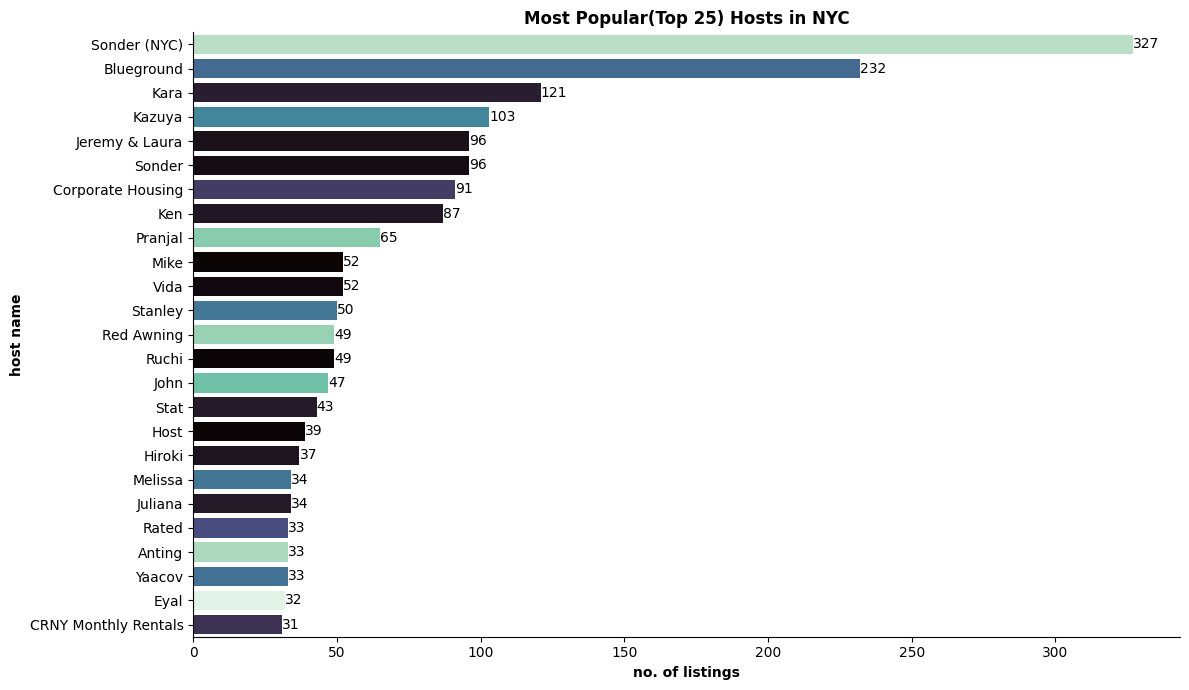

In [16]:
max_host = df_original.groupby(['host_id', 'host_name']).count().sort_values(by='id', ascending=False).head(25)

# Creating subplots
fig, axes = plt.subplots(figsize=(12, 7))

# Plotting the first subplot of the figure
sns.barplot(max_host,
            x="id",
            y="host_name",
            hue="host_id",
            orient="h",
            legend=False,
            palette="mako")
axes.set_title('Most Popular(Top 25) Hosts in NYC',
                  fontweight ='bold')
axes.set_xlabel('no. of listings',
                   fontweight ='bold')
axes.set_ylabel('host name',
                   fontweight ='bold')
axes.tick_params(axis='x')
for container in axes.containers:
    axes.bar_label(container)

sns.despine()
# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

****
Sonder in NYC has the most listings (300+), followed by Blueground (232), Kara (121), Kazuya (103), and others. By comparing these top hosts, businesses can uncover shared characteristics or strategies that drive their popularity. This analysis aids in refining business strategies, optimizing listings, and enhancing customer satisfaction to compete effectively in the market.

- **Understanding the market**
  * Analyzing the market landscape is essential for any business endeavor, whether it's a newcomer or an established entity. As per the fundamental economic principle, "Every firm's primary objective is profit maximization," it becomes imperative to gauge the potential profitability within the local market.
  * In our scenario, comprehending the distribution of market share among various businesses or hosts is paramount. It allows us to discern which hosts dominate the market, identify their competitors, and ascertain the factors contributing to their success. By pinpointing areas where competitors fall short (market gaps), businesses can capitalize on these opportunities and provide consumers with effective solutions.
- **Understanding your competitiors**
  * Just as it is important to find your competitive advantage in the market, if you know your competition’s movements, weak spots, strengths and marketing strategies, you can ultimately stay ahead of the game. Businesses need to know who their competition is, what they are doing or have already tried to do, in order to discover traits and tactics that they can use to their advantage.
  * Awareness of competitor activities enables firms to adopt innovative approaches while leveraging successful strategies already implemented by competitors.

In essence, thorough market analysis and competitor evaluation provide invaluable insights for businesses seeking to thrive in a competitive landscape. By identifying market trends, consumer preferences, and competitor strategies, businesses can refine their own strategies, capitalize on opportunities, and mitigate risks effectively.
****

#### **Chart 1.2: Neighbourhood with most bookings/listings for top 4 hosts**

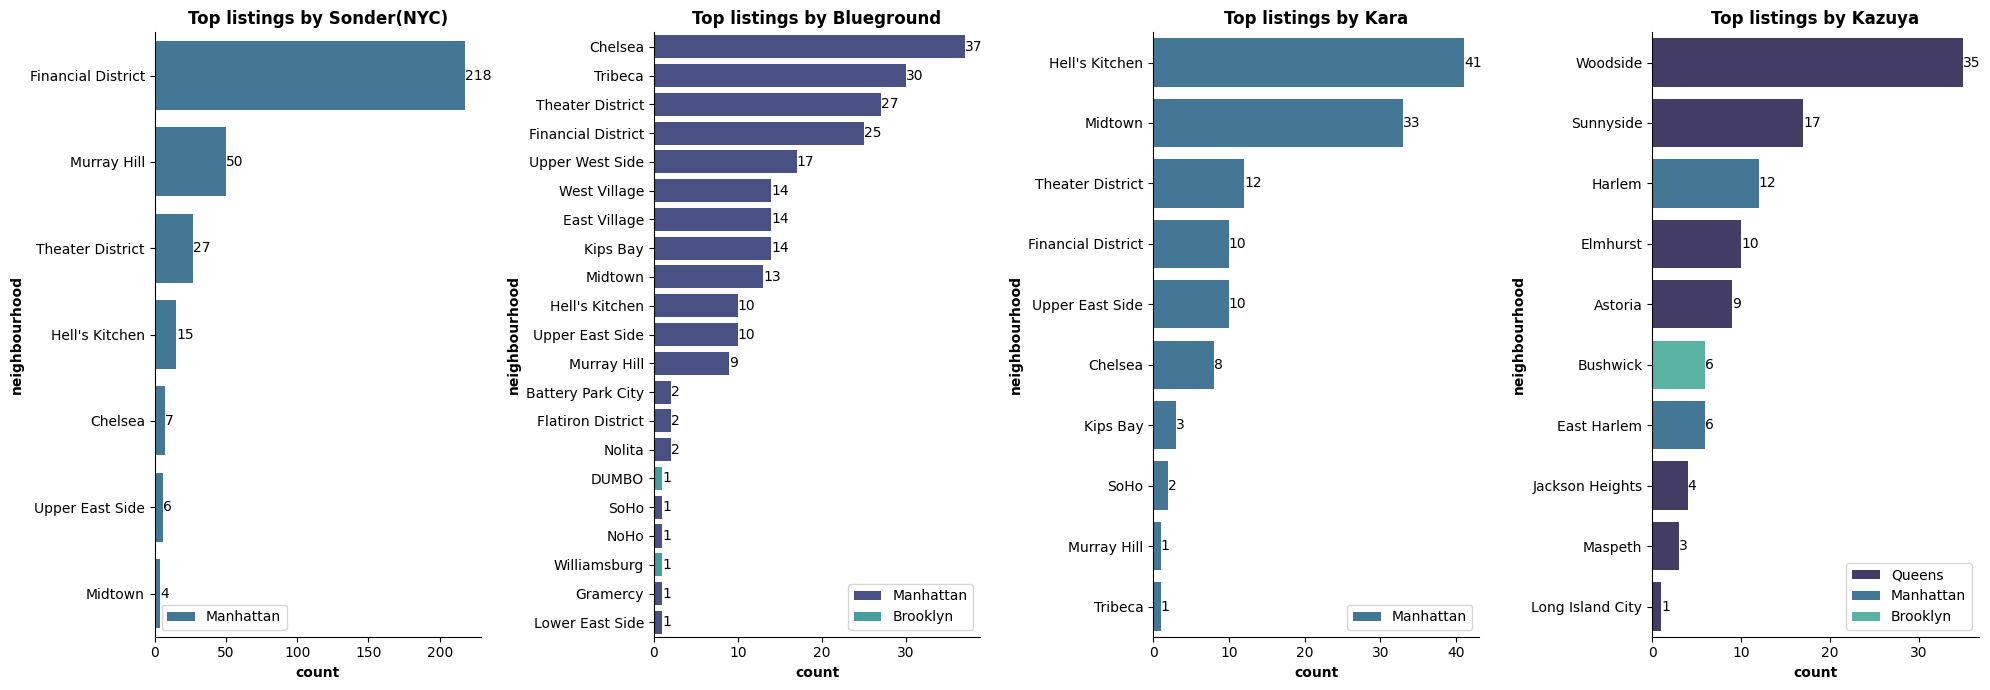

In [17]:
host_one = df_original.loc[df_original['host_id']==219517861].groupby(['neighbourhood_group', 'neighbourhood']).count().sort_values(by='id', ascending=False)
host_two = df_original.loc[df_original['host_id']==107434423].groupby(['neighbourhood_group', 'neighbourhood']).count().sort_values(by='id', ascending=False)
host_three = df_original.loc[df_original['host_id']==30283594].groupby(['neighbourhood_group', 'neighbourhood']).count().sort_values(by='id', ascending=False)
host_four = df_original.loc[df_original['host_id']==137358866].groupby(['neighbourhood_group', 'neighbourhood']).count().sort_values(by='id', ascending=False)
# Creating figure
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 7))
# Top listings by Sonder(NYC)
sns.barplot(host_one,
            x="id",
            y="neighbourhood",
            orient="h",
            hue="neighbourhood_group",
            legend=True,
            ax=axes[0],
            palette="mako")
axes[0].set_title('Top listings by Sonder(NYC)',
                  fontweight ='bold')
axes[0].set_xlabel('count',
                   fontweight ='bold')
axes[0].set_ylabel('neighbourhood',
                   fontweight ='bold')
axes[0].tick_params(axis='x')
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, labels)
for container in axes[0].containers:
    axes[0].bar_label(container)

# Top listings by Blueground
sns.barplot(host_two,
            x="id",
            y="neighbourhood",
            orient="h",
            hue="neighbourhood_group",
            legend=True,
            ax=axes[1],
            palette="mako")
axes[1].set_title('Top listings by Blueground',
                  fontweight ='bold')
axes[1].set_xlabel('count',
                   fontweight ='bold')
axes[1].set_ylabel('neighbourhood',
                   fontweight ='bold')
axes[1].tick_params(axis='x')
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels)
for container in axes[1].containers:
    axes[1].bar_label(container)

# Top listings by Kara
sns.barplot(host_three,
            x="id",
            y="neighbourhood",
            orient="h",
            hue="neighbourhood_group",
            legend=True,
            ax=axes[2],
            palette="mako")
axes[2].set_title('Top listings by Kara',
                  fontweight ='bold')
axes[2].set_xlabel('count',
                   fontweight ='bold')
axes[2].set_ylabel('neighbourhood',
                   fontweight ='bold')
axes[2].tick_params(axis='x')
handles, labels = axes[2].get_legend_handles_labels()
axes[2].legend(handles, labels)
for container in axes[2].containers:
    axes[2].bar_label(container)

# Top listings by Kazuya
sns.barplot(host_four,
            x="id",
            y="neighbourhood",
            orient="h",
            hue="neighbourhood_group",
            legend=True,
            ax=axes[3],
            palette="mako")
axes[3].set_title('Top listings by Kazuya',
                  fontweight ='bold')
axes[3].set_xlabel('count',
                   fontweight ='bold')
axes[3].set_ylabel('neighbourhood',
                   fontweight ='bold')
axes[3].tick_params(axis='x')
handles, labels = axes[3].get_legend_handles_labels()
axes[3].legend(handles, labels)
for container in axes[3].containers:
    axes[3].bar_label(container)

sns.despine()
# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

***
The visualization clearly indicates that the most popular hosts predominantly list their properties in the **Manhattan** neighborhood group.

* Additionally, specific neighborhoods within Manhattan, such as the ***Financial District***, ***Theater District***, ***Hell's Kitchen***, and ***Chelsea***, exhibit higher listing concentrations from these hosts.

Understanding consumer preferences is paramount for long-term business success. Based on the dataset's listings and descriptive statistics, it's evident that Manhattan is a favored neighborhood among guests visiting NYC. Therefore, it's strategically sound for hosts to rent apartments and rooms within this neighborhood group. However, it's important to note that Manhattan's neighborhoods also experience ***heightened competition*** among the top hosts, emphasizing the need for differentiation and strategic positioning within this popular market segment.
****

#### **Chart 1.3: Highest Revenue earned by Neighbourhood and Neighbourhood Group for the Top 4 Hosts**

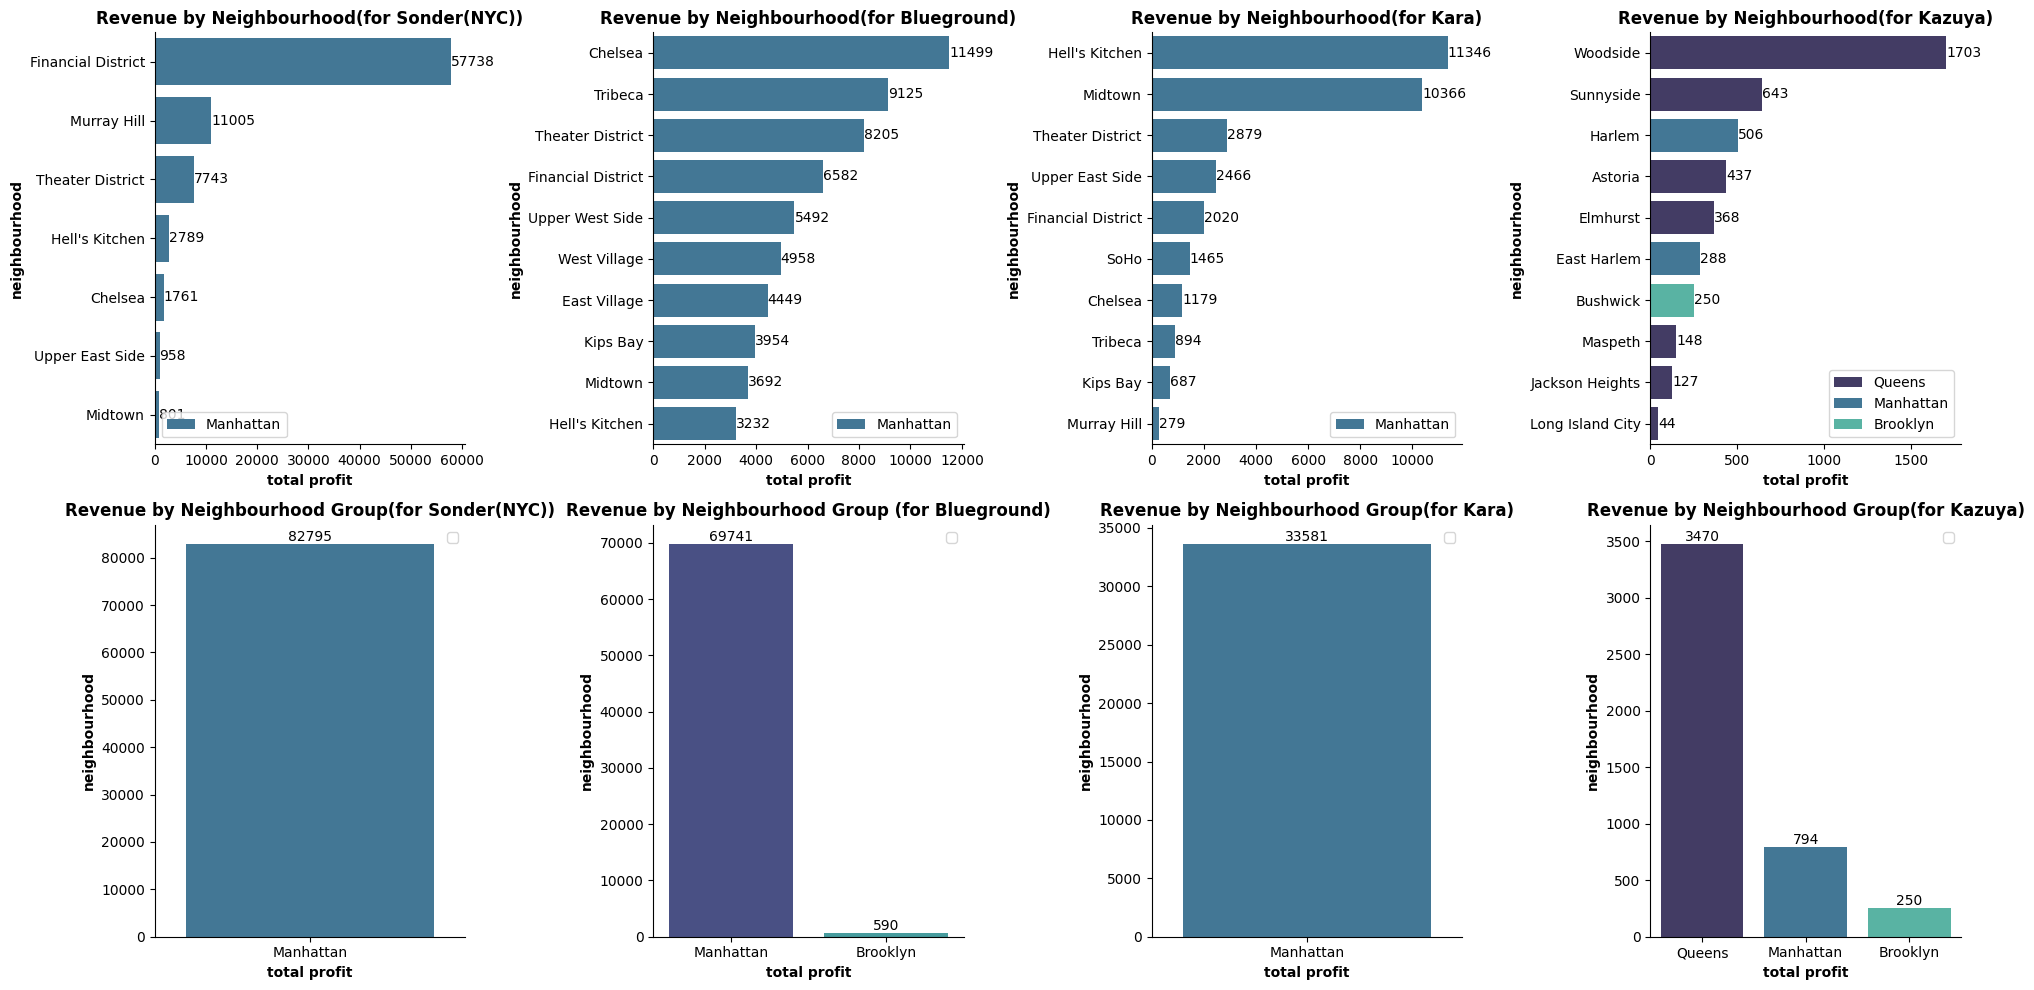

In [18]:
host_one = df_original.loc[df_original['host_id']==219517861]
host_two = df_original.loc[df_original['host_id']==107434423]
host_three = df_original.loc[df_original['host_id']==30283594]
host_four = df_original.loc[df_original['host_id']==137358866]

# Creating figure
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
#
sns.barplot(host_one.groupby(['neighbourhood_group', 'neighbourhood']).sum(numeric_only=True).sort_values(by='price', ascending=False).head(10),
            x="price",
            y="neighbourhood",
            orient="h",
            hue="neighbourhood_group",
            legend=True,
            ax=axes[0,0],
            palette="mako")
axes[0,0].set_title('Revenue by Neighbourhood(for Sonder(NYC))',
                  fontweight ='bold')
axes[0,0].set_xlabel('total profit',
                   fontweight ='bold')
axes[0,0].set_ylabel('neighbourhood',
                   fontweight ='bold')
axes[0,0].tick_params(axis='x')
handles, labels = axes[0,0].get_legend_handles_labels()
axes[0,0].legend(handles, labels)
for container in axes[0,0].containers:
    axes[0,0].bar_label(container)
#
sns.barplot(host_two.groupby(['neighbourhood_group', 'neighbourhood']).sum(numeric_only=True).sort_values(by='price', ascending=False).head(10),
            x="price",
            y="neighbourhood",
            orient="h",
            hue="neighbourhood_group",
            legend=True,
            ax=axes[0,1],
            palette="mako")
axes[0,1].set_title('Revenue by Neighbourhood(for Blueground)',
                  fontweight ='bold')
axes[0,1].set_xlabel('total profit',
                   fontweight ='bold')
axes[0,1].set_ylabel('neighbourhood',
                   fontweight ='bold')
axes[0,1].tick_params(axis='x')
handles, labels = axes[0,1].get_legend_handles_labels()
axes[0,1].legend(handles, labels)
for container in axes[0,1].containers:
    axes[0,1].bar_label(container)
#
sns.barplot(host_three.groupby(['neighbourhood_group', 'neighbourhood']).sum(numeric_only=True).sort_values(by='price', ascending=False).head(10),
            x="price",
            y="neighbourhood",
            orient="h",
            hue="neighbourhood_group",
            legend=True,
            ax=axes[0,2],
            palette="mako")
axes[0,2].set_title('Revenue by Neighbourhood(for Kara)',
                  fontweight ='bold')
axes[0,2].set_xlabel('total profit',
                   fontweight ='bold')
axes[0,2].set_ylabel('neighbourhood',
                   fontweight ='bold')
axes[0,2].tick_params(axis='x')
handles, labels = axes[0,2].get_legend_handles_labels()
axes[0,2].legend(handles, labels)
for container in axes[0,2].containers:
    axes[0,2].bar_label(container)
#
sns.barplot(host_four.groupby(['neighbourhood_group', 'neighbourhood']).sum(numeric_only=True).sort_values(by='price', ascending=False).head(10),
            x="price",
            y="neighbourhood",
            orient="h",
            hue="neighbourhood_group",
            legend=True,
            ax=axes[0,3],
            palette="mako")
axes[0,3].set_title('Revenue by Neighbourhood(for Kazuya)',
                  fontweight ='bold')
axes[0,3].set_xlabel('total profit',
                   fontweight ='bold')
axes[0,3].set_ylabel('neighbourhood',
                   fontweight ='bold')
axes[0,3].tick_params(axis='x')
handles, labels = axes[0,3].get_legend_handles_labels()
axes[0,3].legend(handles, labels)
for container in axes[0,3].containers:
    axes[0,3].bar_label(container)

#
sns.barplot(host_one.groupby(['neighbourhood_group']).sum(numeric_only=True).sort_values(by='price', ascending=False),
            y="price",
            x="neighbourhood_group",
            hue="neighbourhood_group",
            legend=False,
            ax=axes[1,0],
            palette="mako")
axes[1,0].set_title('Revenue by Neighbourhood Group(for Sonder(NYC))',
                  fontweight ='bold')
axes[1,0].set_xlabel('total profit',
                   fontweight ='bold')
axes[1,0].set_ylabel('neighbourhood',
                   fontweight ='bold')
axes[1,0].tick_params(axis='x')
handles, labels = axes[1,0].get_legend_handles_labels()
axes[1,0].legend(handles, labels)
for container in axes[1,0].containers:
    axes[1,0].bar_label(container)
#
sns.barplot(host_two.groupby(['neighbourhood_group']).sum(numeric_only=True).sort_values(by='price', ascending=False),
            y="price",
            x="neighbourhood_group",
            hue="neighbourhood_group",
            legend=False,
            ax=axes[1,1],
            palette="mako")
axes[1,1].set_title('Revenue by Neighbourhood Group (for Blueground)',
                  fontweight ='bold')
axes[1,1].set_xlabel('total profit',
                   fontweight ='bold')
axes[1,1].set_ylabel('neighbourhood',
                   fontweight ='bold')
axes[1,1].tick_params(axis='x')
handles, labels = axes[1,1].get_legend_handles_labels()
axes[1,1].legend(handles, labels)
for container in axes[1,1].containers:
    axes[1,1].bar_label(container)
#
sns.barplot(host_three.groupby(['neighbourhood_group']).sum(numeric_only=True).sort_values(by='price', ascending=False),
            y="price",
            x="neighbourhood_group",
            hue="neighbourhood_group",
            legend=False,
            ax=axes[1,2],
            palette="mako")
axes[1,2].set_title('Revenue by Neighbourhood Group(for Kara)',
                  fontweight ='bold')
axes[1,2].set_xlabel('total profit',
                   fontweight ='bold')
axes[1,2].set_ylabel('neighbourhood',
                   fontweight ='bold')
axes[1,2].tick_params(axis='x')
handles, labels = axes[1,2].get_legend_handles_labels()
axes[1,2].legend(handles, labels)
for container in axes[1,2].containers:
    axes[1,2].bar_label(container)
#
sns.barplot(host_four.groupby(['neighbourhood_group']).sum(numeric_only=True).sort_values(by='price', ascending=False),
            y="price",
            x="neighbourhood_group",
            hue="neighbourhood_group",
            legend=False,
            ax=axes[1,3],
            palette="mako")
axes[1,3].set_title('Revenue by Neighbourhood Group(for Kazuya)',
                  fontweight ='bold')
axes[1,3].set_xlabel('total profit',
                   fontweight ='bold')
axes[1,3].set_ylabel('neighbourhood',
                   fontweight ='bold')
axes[1,3].tick_params(axis='x')
handles, labels = axes[1,3].get_legend_handles_labels()
axes[1,3].legend(handles, labels)
for container in axes[1,3].containers:
    axes[1,3].bar_label(container)


sns.despine()
# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

#### **Chart 1.4: Average Price of listings for the Top 4 Hosts**

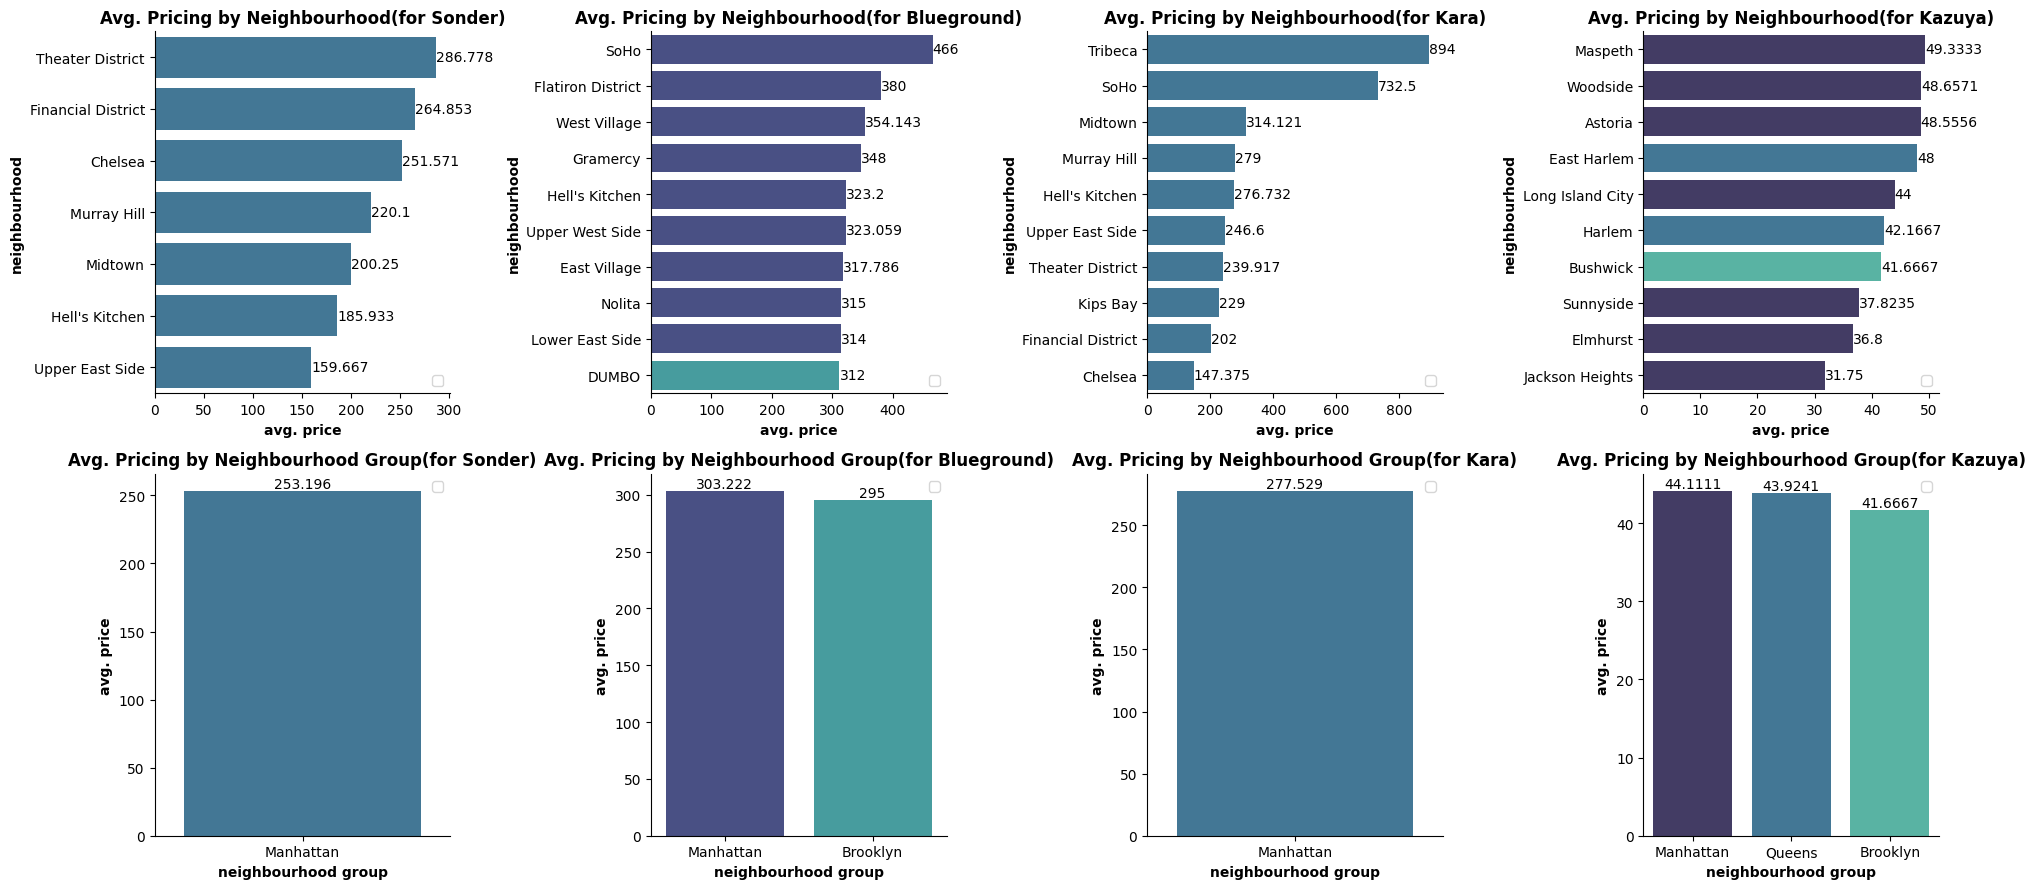

In [19]:
host_one = df_original.loc[df_original['host_id']==219517861]
host_two = df_original.loc[df_original['host_id']==107434423]
host_three = df_original.loc[df_original['host_id']==30283594]
host_four = df_original.loc[df_original['host_id']==137358866]

# Creating figure
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 9))
# avg. pricing by neighbourhood for Sonder(NYC)
sns.barplot(host_one.groupby(['neighbourhood_group', 'neighbourhood']).mean(numeric_only=True).sort_values(by='price', ascending=False).head(10),
            x="price",
            y="neighbourhood",
            orient="h",
            hue="neighbourhood_group",
            legend=False,
            ax=axes[0,0],
            palette="mako")
axes[0,0].set_title('Avg. Pricing by Neighbourhood(for Sonder)',
                  fontweight ='bold')
axes[0,0].set_xlabel('avg. price',
                   fontweight ='bold')
axes[0,0].set_ylabel('neighbourhood',
                   fontweight ='bold')
axes[0,0].tick_params(axis='x')
handles, labels = axes[0,0].get_legend_handles_labels()
axes[0,0].legend(handles, labels)
for container in axes[0,0].containers:
    axes[0,0].bar_label(container)

# avg. pricing by neighbourhood for Blueground
sns.barplot(host_two.groupby(['neighbourhood_group', 'neighbourhood']).mean(numeric_only=True).sort_values(by='price', ascending=False).head(10),
            x="price",
            y="neighbourhood",
            orient="h",
            hue="neighbourhood_group",
            legend=False,
            ax=axes[0,1],
            palette="mako")
axes[0,1].set_title('Avg. Pricing by Neighbourhood(for Blueground)',
                  fontweight ='bold')
axes[0,1].set_xlabel('avg. price',
                   fontweight ='bold')
axes[0,1].set_ylabel('neighbourhood',
                   fontweight ='bold')
axes[0,1].tick_params(axis='x')
handles, labels = axes[0,1].get_legend_handles_labels()
axes[0,1].legend(handles, labels)
for container in axes[0,1].containers:
    axes[0,1].bar_label(container)

# avg. pricing by neighbourhood for Kara
sns.barplot(host_three.groupby(['neighbourhood_group', 'neighbourhood']).mean(numeric_only=True).sort_values(by='price', ascending=False).head(10),
            x="price",
            y="neighbourhood",
            orient="h",
            hue="neighbourhood_group",
            legend=False,
            ax=axes[0,2],
            palette="mako")
axes[0,2].set_title('Avg. Pricing by Neighbourhood(for Kara)',
                  fontweight ='bold')
axes[0,2].set_xlabel('avg. price',
                   fontweight ='bold')
axes[0,2].set_ylabel('neighbourhood',
                   fontweight ='bold')
axes[0,2].tick_params(axis='x')
handles, labels = axes[0,2].get_legend_handles_labels()
axes[0,2].legend(handles, labels)
for container in axes[0,2].containers:
    axes[0,2].bar_label(container)

# avg. pricing by neighbourhood for Kazuya
sns.barplot(host_four.groupby(['neighbourhood_group', 'neighbourhood']).mean(numeric_only=True).sort_values(by='price', ascending=False).head(10),
            x="price",
            y="neighbourhood",
            orient="h",
            hue="neighbourhood_group",
            legend=False,
            ax=axes[0,3],
            palette="mako")
axes[0,3].set_title('Avg. Pricing by Neighbourhood(for Kazuya)',
                  fontweight ='bold')
axes[0,3].set_xlabel('avg. price',
                   fontweight ='bold')
axes[0,3].set_ylabel('neighbourhood',
                   fontweight ='bold')
axes[0,3].tick_params(axis='x')
handles, labels = axes[0,3].get_legend_handles_labels()
axes[0,3].legend(handles, labels)
for container in axes[0,3].containers:
    axes[0,3].bar_label(container)

# avg. pricing by neighbourhood group for Sonder(NYC)
sns.barplot(host_one.groupby(['neighbourhood_group']).mean(numeric_only=True).sort_values(by='price', ascending=False).head(10),
            y="price",
            x="neighbourhood_group",
            hue="neighbourhood_group",
            legend=False,
            ax=axes[1,0],
            palette="mako")
axes[1,0].set_title('Avg. Pricing by Neighbourhood Group(for Sonder)',
                  fontweight ='bold')
axes[1,0].set_ylabel('avg. price',
                   fontweight ='bold')
axes[1,0].set_xlabel('neighbourhood group',
                   fontweight ='bold')
axes[1,0].tick_params(axis='x')
handles, labels = axes[1,0].get_legend_handles_labels()
axes[1,0].legend(handles, labels)
for container in axes[1,0].containers:
    axes[1,0].bar_label(container)

# avg. pricing by neighbourhood group for Blueground
sns.barplot(host_two.groupby(['neighbourhood_group']).mean(numeric_only=True).sort_values(by='price', ascending=False).head(10),
            y="price",
            x="neighbourhood_group",
            hue="neighbourhood_group",
            legend=False,
            ax=axes[1,1],
            palette="mako")
axes[1,1].set_title('Avg. Pricing by Neighbourhood Group(for Blueground)',
                  fontweight ='bold')
axes[1,1].set_xlabel('neighbourhood group',
                   fontweight ='bold')
axes[1,1].set_ylabel('avg. price',
                   fontweight ='bold')
axes[1,1].tick_params(axis='x')
handles, labels = axes[1,1].get_legend_handles_labels()
axes[1,1].legend(handles, labels)
for container in axes[1,1].containers:
    axes[1,1].bar_label(container)

# avg. pricing by neighbourhood group for Kara
sns.barplot(host_three.groupby(['neighbourhood_group']).mean(numeric_only=True).sort_values(by='price', ascending=False).head(10),
            y="price",
            x="neighbourhood_group",
            hue="neighbourhood_group",
            legend=False,
            ax=axes[1,2],
            palette="mako")
axes[1,2].set_title('Avg. Pricing by Neighbourhood Group(for Kara)',
                  fontweight ='bold')
axes[1,2].set_xlabel('neighbourhood group',
                   fontweight ='bold')
axes[1,2].set_ylabel('avg. price',
                   fontweight ='bold')
axes[1,2].tick_params(axis='x')
handles, labels = axes[1,2].get_legend_handles_labels()
axes[1,2].legend(handles, labels)
for container in axes[1,2].containers:
    axes[1,2].bar_label(container)

# avg. pricing by neighbourhood group for Kazuya
sns.barplot(host_four.groupby(['neighbourhood_group']).mean(numeric_only=True).sort_values(by='price', ascending=False).head(10),
            y="price",
            x="neighbourhood_group",
            hue="neighbourhood_group",
            legend=False,
            ax=axes[1,3],
            palette="mako")
axes[1,3].set_title('Avg. Pricing by Neighbourhood Group(for Kazuya)',
                  fontweight ='bold')
axes[1,3].set_xlabel('neighbourhood group',
                   fontweight ='bold')
axes[1,3].set_ylabel('avg. price',
                   fontweight ='bold')
axes[1,3].tick_params(axis='x')
handles, labels = axes[1,3].get_legend_handles_labels()
axes[1,3].legend(handles, labels)
for container in axes[1,3].containers:
    axes[1,3].bar_label(container)


sns.despine()
# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

----
**Insights:**
* **Price Analysis of Top Hosts:**

  * Among the top 4 hosts, Blueground commands the highest average listing price in Manhattan, followed by Kara, Sonder(NYC), and Kazuya.
  
* **Neighborhood Pricing Trends:**

  * Sonder(NYC) demonstrates varying average prices across Manhattan
  neighborhoods, with the Theater District commanding the highest average price and the Upper East Side the lowest.
  
  * For Blueground, average prices peak in the SoHo district of Manhattan and are lowest in DUMBO, Brooklyn. Blueground's average prices in Manhattan notably exceed those of Sonder(NYC).
  
  * Kara's average prices are highest in Tribeca and lowest in Upper Chelsea, with an overall average price in Manhattan of approximately $277.
  
  * Kazuya's average prices vary across neighborhoods, with the highest average price in Maspeth (Manhattan) and the lowest in Jackson Heights (Manhattan).

* **Comparative Analysis:**

  * In Hell's Kitchen, Blueground commands the highest average price at $323.2, followed by Kara at $276, and Sonder(NYC) at $185. This suggests that Hell's Kitchen is a high-value neighborhood.
  
  * Similarly, neighborhoods such as Tribeca and SoHo are identified as having very high average prices, indicating their premium status within Manhattan.
---
**Implications for Business Strategy:**

* **Pricing Strategy Optimization:**

  * Utilize dynamic pricing strategies to adjust rates based on demand, seasonality, and booking patterns.
  * Monitor competitors' pricing strategies to remain competitive in the market and adapt pricing strategies accordingly.

* **Neighborhood-specific Pricing Tactics:**

  * Capitalize on the insights gained from neighborhood-specific pricing trends to tailor pricing strategies for different locations.
  
  * Consider factors such as neighborhood popularity, amenities, and proximity to attractions when determining listing prices.

* **Enhancing Competitive Positioning:**

  * Leverage insights into competitors' pricing strategies to identify gaps and opportunities within the market.
  
  * Focus on differentiating factors such as unique amenities, superior customer service, or strategic partnerships to enhance competitive positioning.

* **Data-driven Decision Making:**

  * Continuously analyze neighborhood and pricing data to inform strategic decisions and optimize business performance.
  
  * Utilize real-time data and analytics to stay responsive to market dynamics and customer preferences.

****

#### **Will the gained insights help creating a positive business impact?**

By leveraging insights from neighborhood pricing trends and competitive analyses, hosts can refine their pricing strategies, enhance their competitive positioning, and maximize revenue potential in the dynamic hospitality market of New York City. Continued monitoring and adaptation to changing market conditions will be essential to maintaining success and sustaining growth in this competitive landscape.
****

### **Analyzing Most(and Least) Popular Neighbourhood groups and Neighbourhood in NYC**

Analyzing neighborhood data is essential for gaining insights into market segmentation, pricing trends, consumer behavior, competitive dynamics, and growth opportunities. By leveraging this information effectively, businesses can make informed decisions, optimize strategies, and achieve sustainable growth in the competitive marketplace.

#### **Chart 2.1: Most Popular Neighbourhood groups in NYC**

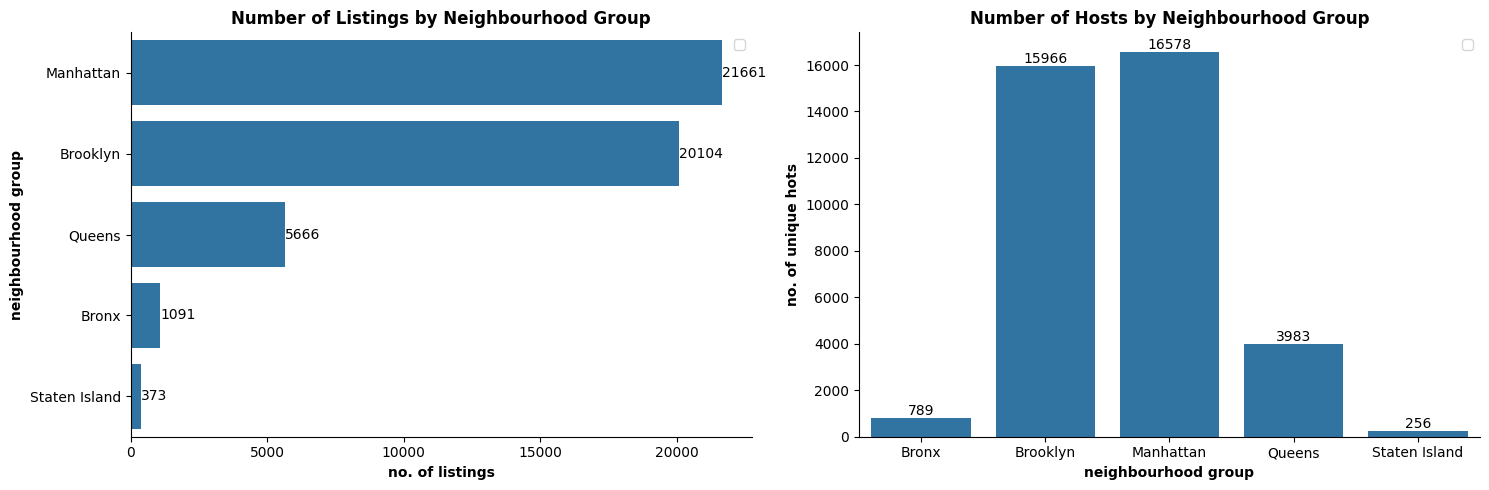

In [20]:
# Creating figure
fig, axes = plt.subplots(ncols = 2, figsize=(15, 5))
#
sns.barplot(df_original.groupby(['neighbourhood_group']).count().sort_values(by='id', ascending=False),
            x="id",
            y="neighbourhood_group",
            ax=axes[0])
axes[0].set_title('Number of Listings by Neighbourhood Group',
               fontweight ='bold')
axes[0].set_xlabel('no. of listings',
                fontweight ='bold')
axes[0].set_ylabel('neighbourhood group',
                fontweight ='bold')
axes[0].tick_params(axis='x')
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, labels)
for container in axes[0].containers:
    axes[0].bar_label(container)
#
#
sns.barplot(df_original.groupby(['neighbourhood_group']).host_id.nunique(),
            ax=axes[1])
axes[1].set_title('Number of Hosts by Neighbourhood Group',
               fontweight ='bold')
axes[1].set_xlabel('neighbourhood group',
                fontweight ='bold')
axes[1].set_ylabel('no. of unique hots',
                fontweight ='bold')
axes[1].tick_params(axis='x')
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels)
for container in axes[1].containers:
    axes[1].bar_label(container)

sns.despine()
# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

****
As observed in the descriptive statistics for neighborhood groups, Manhattan boasts the highest number of bookings and listings, followed by Brooklyn, Queens, Bronx, and Staten Island. This trend is further reflected in the distribution of hosts, with the majority operating in a similar order.

This alignment underscores the popularity and demand for accommodations in Manhattan, likely due to its central location, vibrant attractions, and accessibility to key landmarks and amenities. Brooklyn follows closely behind, offering a diverse range of neighborhoods and cultural experiences. Queens, Bronx, and Staten Island, although trailing in terms of bookings and listings, still contribute to the overall diversity and richness of accommodation options available in New York City.
****

#### **Chart 2.2: Most Popular Neighbourhood in NYC**

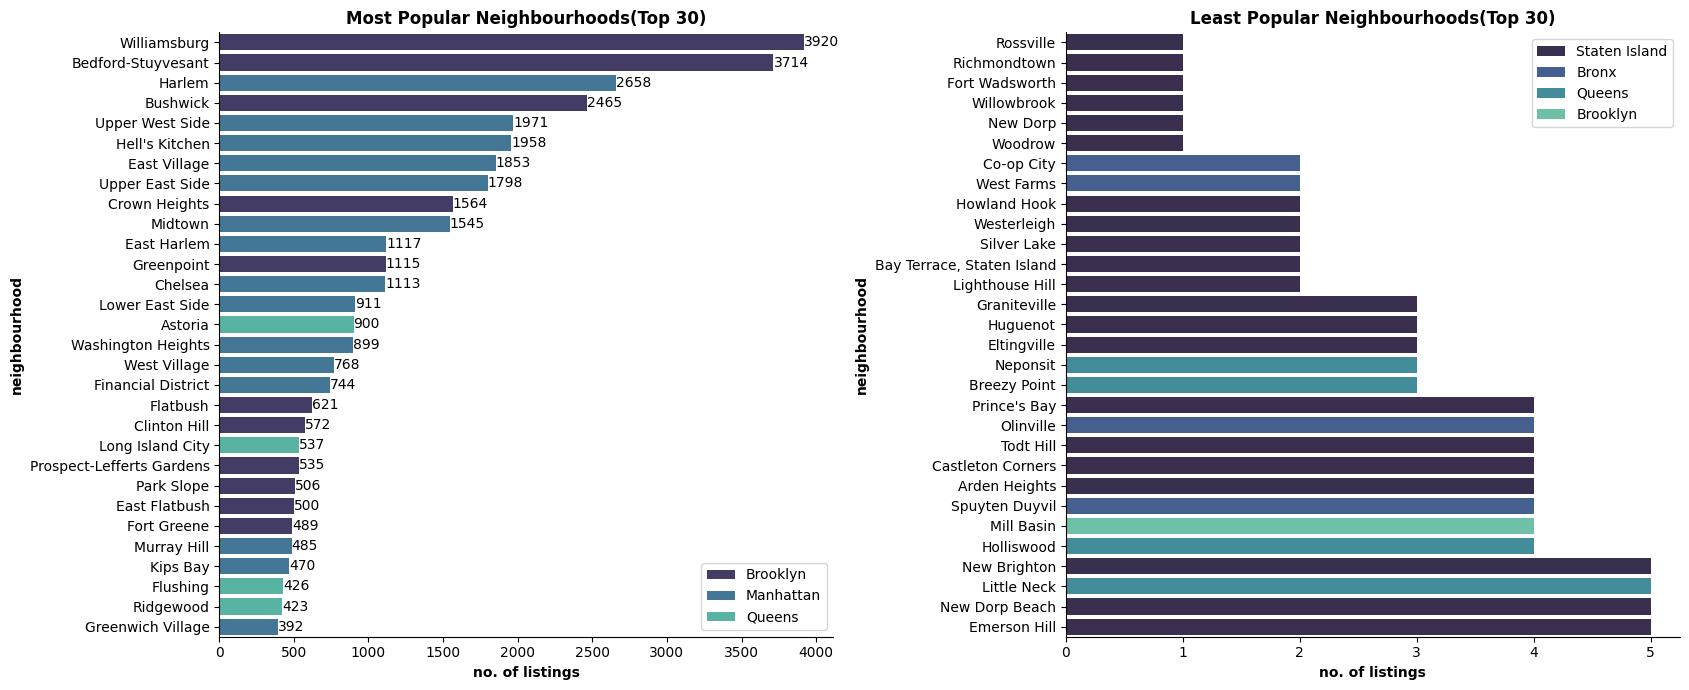

In [21]:
max_host = df_original.groupby(['neighbourhood_group']).host_id.nunique().sort_values(ascending=False)
max_host1 = df_original.groupby(['neighbourhood', 'neighbourhood_group']).count()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))

# Plotting the first subplot (top-left)
sns.barplot(max_host1.sort_values(by='id', ascending=False).head(30),
            y="neighbourhood",
            x="id",
            orient="h",
            ax=axes[0],
            hue="neighbourhood_group",
            legend=True,
            palette="mako")
axes[0].set_title('Most Popular Neighbourhoods(Top 30)',
                  fontweight ='bold')
axes[0].set_xlabel('no. of listings',
                   fontweight ='bold')
axes[0].set_ylabel('neighbourhood',
                   fontweight ='bold')
axes[0].tick_params(axis='x')
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, labels)
for container in axes[0].containers:
    axes[0].bar_label(container)

# Plotting the first subplot (top-left)
sns.barplot(max_host1.sort_values(by='id', ascending=True).head(30),
            y="neighbourhood",
            x="id",
            ax=axes[1],
            orient="h",
            hue="neighbourhood_group",
            legend=True,
            palette="mako")
axes[1].set_title('Least Popular Neighbourhoods(Top 30)',
                  fontweight ='bold')
axes[1].set_xlabel('no. of listings',
                   fontweight ='bold')
axes[1].set_ylabel('neighbourhood',
                   fontweight ='bold')
axes[1].tick_params(axis='x')
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels)

sns.despine()
# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

****
* The observation highlights that ***Williamsburg*** and ***Bedford-Stuyvesant***, both located in Brooklyn, are among the most popular neighborhoods in New York City. Despite Manhattan being home to a majority of the most popular neighborhoods, ***Williamsburg*** and ***Bedford*** significantly outpace even ***Harlem***, the most popular neighborhood in Manhattan, in terms of listings (both having 3,500+ listings compared to Harlem's approximately 2,700 listings).

* Several factors likely contribute to the popularity of ***Williamsburg*** and ***Bedford-Stuyvesant***. These may include their unique cultural vibes, diverse dining and entertainment options, vibrant art scenes, and relatively affordable housing compared to Manhattan. Additionally, their proximity to transportation hubs and attractions may also play a role in attracting both visitors and hosts alike.

* The analysis reveals that the least popular neighborhoods predominantly belong to **Staten Island**, followed by the **Bronx**. This observation aligns with previous findings indicating that **Staten Island** has the lowest number of listings and hosts operating in this area. Additionally, both Staten Island and the Bronx are situated farther from the city center of NYC, which may contribute to their lower listing counts.

* Several factors likely contribute to the lower popularity of these neighborhoods:
  * Firstly, their distance from the city center may make them less attractive to travelers seeking convenient access to attractions and amenities.
  
  * Additionally, these areas may have fewer tourist attractions and cultural landmarks compared to more central neighborhoods, further diminishing their appeal to visitors.

* Furthermore, the absence of listings from the top 4 hosts in these neighborhood groups suggests that these areas may not align with the strategic priorities or target demographics of these hosts.

This underscores the importance of location and neighborhood selection in the hospitality industry and highlights the need for businesses to strategically target high-demand areas to maximize their market reach and profitability.
****

#### **Chart 2.3: Most Popular and Least Popular Neighborhoods by Neighbour Group**

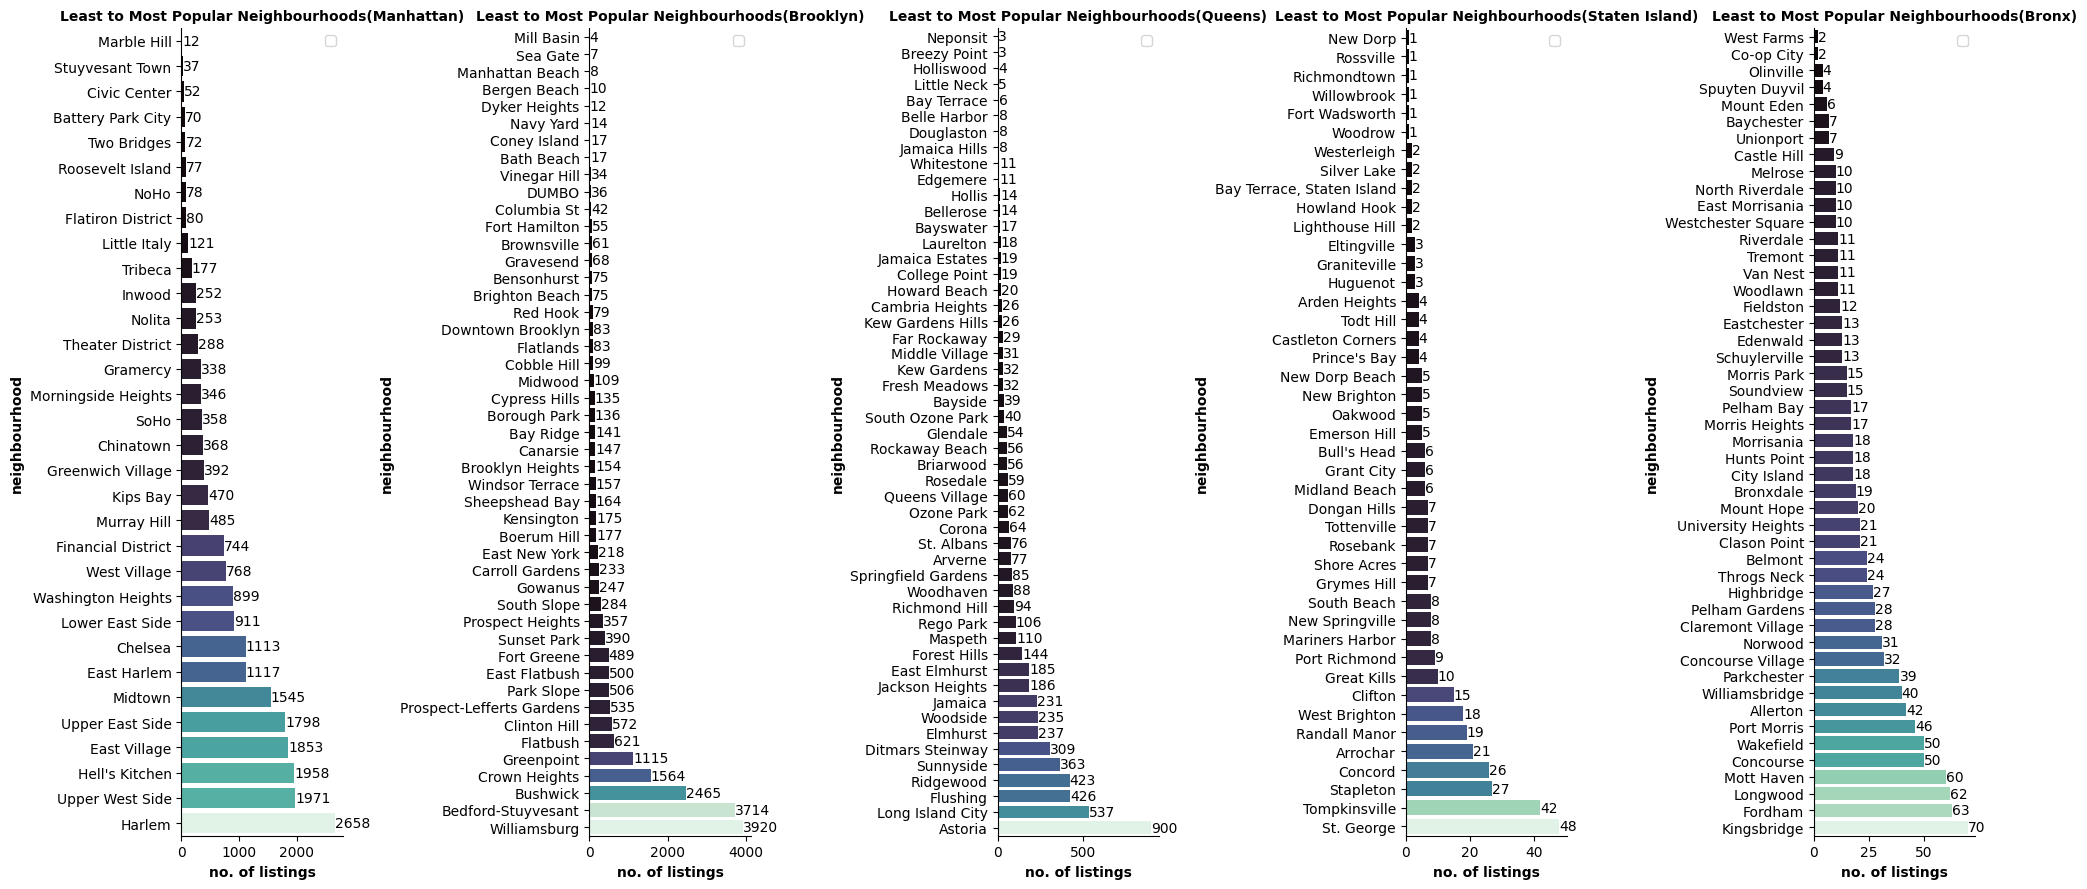

In [22]:
_man = df_original.loc[df_original['neighbourhood_group'] == 'Manhattan'].groupby(['neighbourhood']).count()
_bro = df_original.loc[df_original['neighbourhood_group'] == 'Brooklyn'].groupby(['neighbourhood']).count()
_que = df_original.loc[df_original['neighbourhood_group'] == 'Queens'].groupby(['neighbourhood']).count()
_sta = df_original.loc[df_original['neighbourhood_group'] == 'Staten Island'].groupby(['neighbourhood']).count()
_brox = df_original.loc[df_original['neighbourhood_group'] == 'Bronx'].groupby(['neighbourhood']).count()

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 9))

# Plotting the first subplot (top-left)
sns.barplot(_man.sort_values(by='id', ascending=True),
            y="neighbourhood",
            x="id",
            orient="h",
            ax=axes[0],
            hue="neighbourhood_group",
            legend=False,
            palette="mako")
axes[0].set_title('Least to Most Popular Neighbourhoods(Manhattan)',
                  fontdict={'fontsize': 10, 'fontweight': 'bold'})
axes[0].set_xlabel('no. of listings',
                   fontweight ='bold')
axes[0].set_ylabel('neighbourhood',
                   fontweight ='bold')
axes[0].tick_params(axis='x')
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, labels)
for container in axes[0].containers:
    axes[0].bar_label(container)

# Plotting the first subplot (top-left)
sns.barplot(_bro.sort_values(by='id', ascending=True),
            y="neighbourhood",
            x="id",
            ax=axes[1],
            orient="h",
            hue="neighbourhood_group",
            legend=False,
            palette="mako")
axes[1].set_title('Least to Most Popular Neighbourhoods(Brooklyn)',
                  fontdict={'fontsize': 10, 'fontweight': 'bold'})
axes[1].set_xlabel('no. of listings',
                   fontweight ='bold')
axes[1].set_ylabel('neighbourhood',
                   fontweight ='bold')
axes[1].tick_params(axis='x')
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels)
for container in axes[1].containers:
    axes[1].bar_label(container)

#
sns.barplot(_que.sort_values(by='id', ascending=True),
            y="neighbourhood",
            x="id",
            orient="h",
            ax=axes[2],
            hue="neighbourhood_group",
            legend=False,
            palette="mako")
axes[2].set_title('Least to Most Popular Neighbourhoods(Queens)',
                  fontdict={'fontsize': 10, 'fontweight': 'bold'})
axes[2].set_xlabel('no. of listings',
                   fontweight ='bold')
axes[2].set_ylabel('neighbourhood',
                   fontweight ='bold')
axes[2].tick_params(axis='x')
handles, labels = axes[2].get_legend_handles_labels()
axes[2].legend(handles, labels)
for container in axes[2].containers:
    axes[2].bar_label(container)

# Plotting the first subplot (top-left)
sns.barplot(_sta.sort_values(by='id', ascending=True),
            y="neighbourhood",
            x="id",
            ax=axes[3],
            orient="h",
            hue="neighbourhood_group",
            legend=False,
            palette="mako")
axes[3].set_title('Least to Most Popular Neighbourhoods(Staten Island)',
                  fontdict={'fontsize': 10, 'fontweight': 'bold'})
axes[3].set_xlabel('no. of listings',
                   fontweight ='bold')
axes[3].set_ylabel('neighbourhood',
                   fontweight ='bold')
axes[3].tick_params(axis='x')
handles, labels = axes[3].get_legend_handles_labels()
axes[3].legend(handles, labels)
for container in axes[3].containers:
    axes[3].bar_label(container)

# Plotting the first subplot (top-left)
sns.barplot(_brox.sort_values(by='id', ascending=True),
            y="neighbourhood",
            x="id",
            ax=axes[4],
            orient="h",
            hue="neighbourhood_group",
            legend=False,
            palette="mako")
axes[4].set_title('Least to Most Popular Neighbourhoods(Bronx)',
                  fontdict={'fontsize': 10, 'fontweight': 'bold'})
axes[4].set_xlabel('no. of listings',
                   fontweight ='bold')
axes[4].set_ylabel('neighbourhood',
                   fontweight ='bold')
axes[4].tick_params(axis='x')
handles, labels = axes[4].get_legend_handles_labels()
axes[4].legend(handles, labels)
for container in axes[4].containers:
    axes[4].bar_label(container)

sns.despine()
# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

***
By conducting an analysis of both the least and most popular neighborhoods within each neighborhood group in NYC, we can gain valuable insights into guest preferences and destination popularity. For instance, we observe that **Harlem** emerges as the most popular neighborhood in **Manhattan**, while **Williamsburg** is favored in **Brooklyn**, and **Astoria** in **Queens**. Understanding these trends enables hosts and property managers to strategically position their listings in areas with higher tourist/guest demand.

For example, a business seeking to enter the rental market in Manhattan, insights from this analysis suggest that neighborhoods such as **Harlem**, **Upper West Side**, and **Hell's Kitchen** are preferred destinations among guests visiting the area. This information can inform location-based investment decisions, allowing businesses to focus resources and marketing efforts on areas with higher potential for occupancy and revenue generation.

Moreover, our analysis underscores the importance of data-driven decision-making in the hospitality industry. By leveraging insights derived from neighborhood popularity trends, businesses can optimize their property portfolios, enhance guest satisfaction, and drive competitive advantage in the market.
***


#### **Will the gained insights help creating a positive business impact?**

Understanding which neighborhoods are most popular among guests allows businesses to focus their marketing efforts and resources on those areas.Knowledge of popular neighborhoods enables businesses to implement dynamic pricing strategies that reflect demand fluctuations across different areas. Pricing adjustments can be made based on neighborhood popularity, allowing businesses to maximize revenue during peak periods and attract guests during slower times. Insights into neighborhood popularity can inform strategic decisions regarding property acquisition and expansion.
***


### **Analyzing Room Types**
Analyzing room types helps hosts understand guest preferences and booking behaviors. By identifying which types of accommodations guests prefer (e.g., Entire Apartments, Private Rooms, Shared Rooms), hosts can tailor their offerings to meet customer demands more effectively.

#### **Chart 3.1: Understanding Preffered Room Types and their Average Prices**

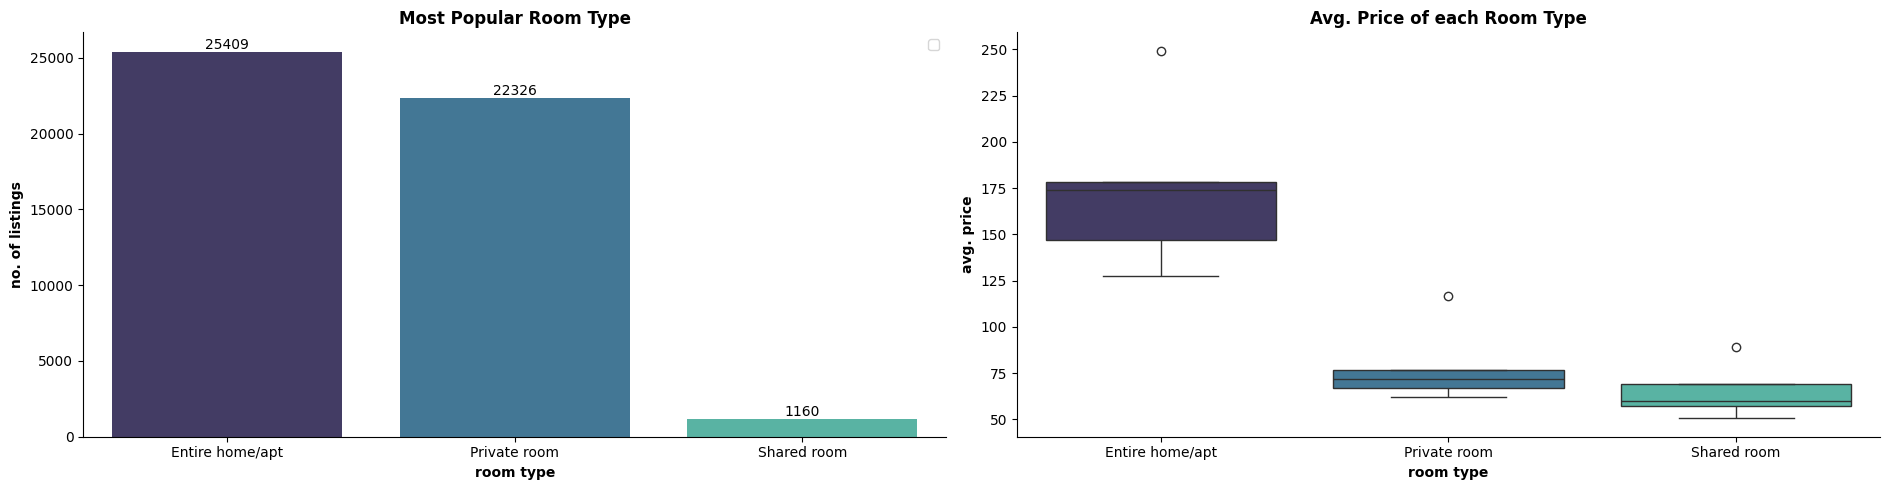

In [23]:
max_rooms = df_original.groupby(['room_type']).count().sort_values(by='host_id', ascending=False)
grouped_means = df_original.groupby(['neighbourhood_group', 'room_type'])[['price']].mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(19, 5))

# Plotting the first subplot
sns.barplot(max_rooms,
            y="host_id",
            x="room_type",
            ax=axes[0],
            hue="room_type",
            legend=False,
            palette="mako")
axes[0].set_title('Most Popular Room Type',
                  fontweight ='bold')
axes[0].set_xlabel('room type',
                   fontweight ='bold')
axes[0].set_ylabel('no. of listings',
                   fontweight ='bold')
axes[0].tick_params(axis='x')
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, labels)
for container in axes[0].containers:
    axes[0].bar_label(container)

# Plotting the second subplot
sns.boxplot(grouped_means,
               y="price",
               x="room_type",
               ax=axes[1],
               hue="room_type",
               legend=False,
               palette="mako")
axes[1].set_title('Avg. Price of each Room Type',
                  fontweight ='bold')
axes[1].set_xlabel('room type',
                   fontweight ='bold')
axes[1].set_ylabel('avg. price',
                   fontweight ='bold')
axes[1].tick_params(axis='x')
handles, labels = axes[1].get_legend_handles_labels()

sns.despine()
# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

***

From the visualization, it's evident that guests predominantly prefer booking Entire Apartments and Private Rooms over Shared Rooms. Specifically, more than 50 percent of the listings in our dataset correspond to bookings for Entire Apartments.
* When examining the average prices of each room type through boxplot analysis, it becomes clear that the avg. prices for Entire Homes/Apartments are notably higher compared to the other two room types.
* The average prices for Private Rooms and Shared Rooms are relatively closer to each other in comparison to Entire Apartments.

These insights suggest that hosts may prioritize listing Entire Apartments over Private and Shared Rooms due to the potential for higher revenue and profit. Given the significantly higher average prices associated with Entire Apartments, hosts can capitalize on guest preferences for this room type to maximize earnings from their listings. This strategic decision aligns with the aim of optimizing profitability and leveraging market demand trends within the hospitality industry.
***

#### **Chart 3.2: Room Type Count by Neighbourhood Groups**

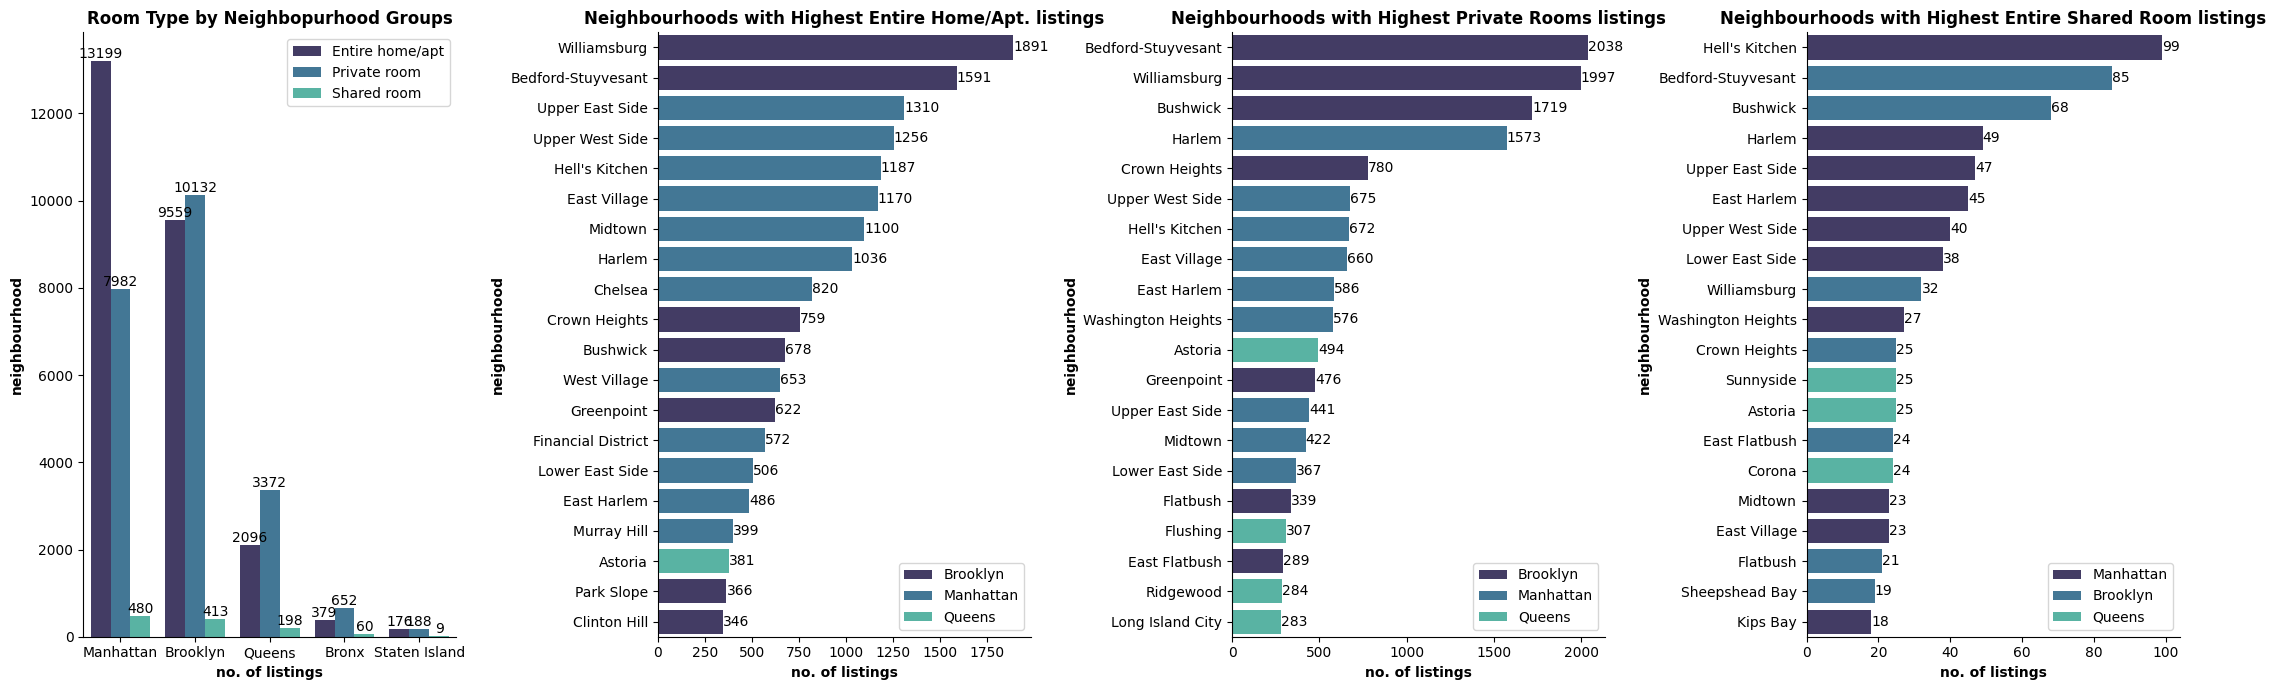

In [24]:
max_rooms1 = df_original.groupby(['neighbourhood_group', 'room_type']).count().sort_values(by='id', ascending=False)
room_pvt = df_original.loc[df_original['room_type'] == 'Private room'].groupby(['neighbourhood_group', 'neighbourhood']).count().sort_values(by='id', ascending=False).head(20)
room_home = df_original.loc[df_original['room_type'] == 'Entire home/apt'].groupby(['neighbourhood_group', 'neighbourhood']).count().sort_values(by='id', ascending=False).head(20)
room_shared = df_original.loc[df_original['room_type'] == 'Shared room'].groupby(['neighbourhood_group', 'neighbourhood']).count().sort_values(by='id', ascending=False).head(20)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(22, 7))
# Plotting Room Type by Neighbopurhood Groups
sns.barplot(max_rooms1,
            y="id",
            x="neighbourhood_group",
            ax=axes[0],
            hue="room_type",
            legend=True,
            palette="mako")
axes[0].set_title('Room Type by Neighbopurhood Groups',
                  fontweight ='bold')
axes[0].set_xlabel('no. of listings',
                   fontweight ='bold')
axes[0].set_ylabel('neighbourhood',
                   fontweight ='bold')
axes[0].tick_params(axis='x')
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, labels)
for container in axes[0].containers:
    axes[0].bar_label(container)

# Plotting Neighbourhoods with Highest Entire Home/Apt. listings
sns.barplot(room_home,
            x="id",
            y="neighbourhood",
            orient="h",
            ax=axes[1],
            hue="neighbourhood_group",
            legend=True,
            palette="mako")
axes[1].set_title('Neighbourhoods with Highest Entire Home/Apt. listings',
                  fontweight ='bold')
axes[1].set_xlabel('no. of listings',
                   fontweight ='bold')
axes[1].set_ylabel('neighbourhood',
                   fontweight ='bold')
axes[1].tick_params(axis='x')
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels)
for container in axes[1].containers:
    axes[1].bar_label(container)

# Plotting Neighbourhoods with Highest Private Rooms listings
sns.barplot(room_pvt,
            x="id",
            y="neighbourhood",
            orient="h",
            ax=axes[2],
            hue="neighbourhood_group",
            legend=True,
            palette="mako")
axes[2].set_title('Neighbourhoods with Highest Private Rooms listings',
                  fontweight ='bold')
axes[2].set_xlabel('no. of listings',
                   fontweight ='bold')
axes[2].set_ylabel('neighbourhood',
                   fontweight ='bold')
axes[2].tick_params(axis='x')
handles, labels = axes[2].get_legend_handles_labels()
axes[2].legend(handles, labels)
for container in axes[2].containers:
    axes[2].bar_label(container)

# Plotting Neighbourhoods with Highest Entire Shared Room listings
sns.barplot(room_shared,
            x="id",
            y="neighbourhood",
            orient="h",
            ax=axes[3],
            hue="neighbourhood_group",
            legend=True,
            palette="mako")
axes[3].set_title('Neighbourhoods with Highest Entire Shared Room listings',
                  fontweight ='bold')
axes[3].set_xlabel('no. of listings',
                   fontweight ='bold')
axes[3].set_ylabel('neighbourhood',
                   fontweight ='bold')
axes[3].tick_params(axis='x')
handles, labels = axes[3].get_legend_handles_labels()
axes[3].legend(handles, labels)
for container in axes[3].containers:
    axes[3].bar_label(container)

sns.despine()
# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

***
From the provided visualization, it's evident that Entire Apartments and Private Rooms are the predominant room types across all neighborhood groups in NYC, with Shared Rooms being less common.

* **Manhattan** stands out as the neighborhood group with the highest number of ***Entire Apartments***, followed by **Brooklyn**, **Queens**, **Bronx**, and **Staten Island**.

* Similarly, **Brooklyn** leads in the number of ***Private Rooms***, followed by **Manhattan**, **Queens**, **Bronx**, and **Staten Island**.

* This pattern reinforces previous findings indicating that guests tend to prefer accommodations in the central areas of NYC, particularly in **Manhattan**, **Brooklyn**, and **Queens**.

* Neighborhoods such as **Williamsburg**, **Bedford**, **Hell's Kitchen**, **Harlem**, **Upper East and West Sides**, and **Bushwick** emerge as the most popular destinations due to their high listing counts across all room types.

* Additionally, **Astoria** stands out as a preferred destination in **Queens**, with a relatively high number of bookings compared to other neighborhoods in the borough.
***

#### **Will the gained insights help creating a positive business impact?**

Understanding guest or consumer preferences is indeed crucial for businesses to achieve higher profitability and revenue. By aligning their offerings with consumer values and needs, businesses can enhance customer satisfaction, loyalty, and ultimately, financial success. Analyzing guest preferences regarding room types provides hosts with valuable insights to better list and market their rooms or apartments to consumers effectively.

Moreover, understanding which room types are preferred in specific neighborhoods offers deeper insights into local market dynamics and competition. By recognizing trends in room type preferences within different neighborhoods, hosts can tailor their strategies to meet local demand effectively. This may involve adjusting pricing strategies, offering incentives or amenities tailored to specific room types, or focusing marketing efforts on areas with higher demand for certain accommodations.

Ultimately, by leveraging insights into guest preferences and neighborhood-specific market dynamics, businesses can optimize their operations, enhance their competitiveness, and capitalize on opportunities to maximize profitability and revenue within the hospitality industry.

Overall, the insights gained from understanding guest preferences can have a significant positive impact on business outcomes, including increased customer satisfaction, revenue growth, competitive advantage, and operational efficiency within NYC.
***

### **Analyzing Price Distribution and Average Price of Listings**

Leveraging insights from pricing analysis can enable businesses to make data-driven decisions, better meet customer needs, and ultimately drive positive business outcomes.

#### **Chart 4.1: Price Distribution using Histogram**

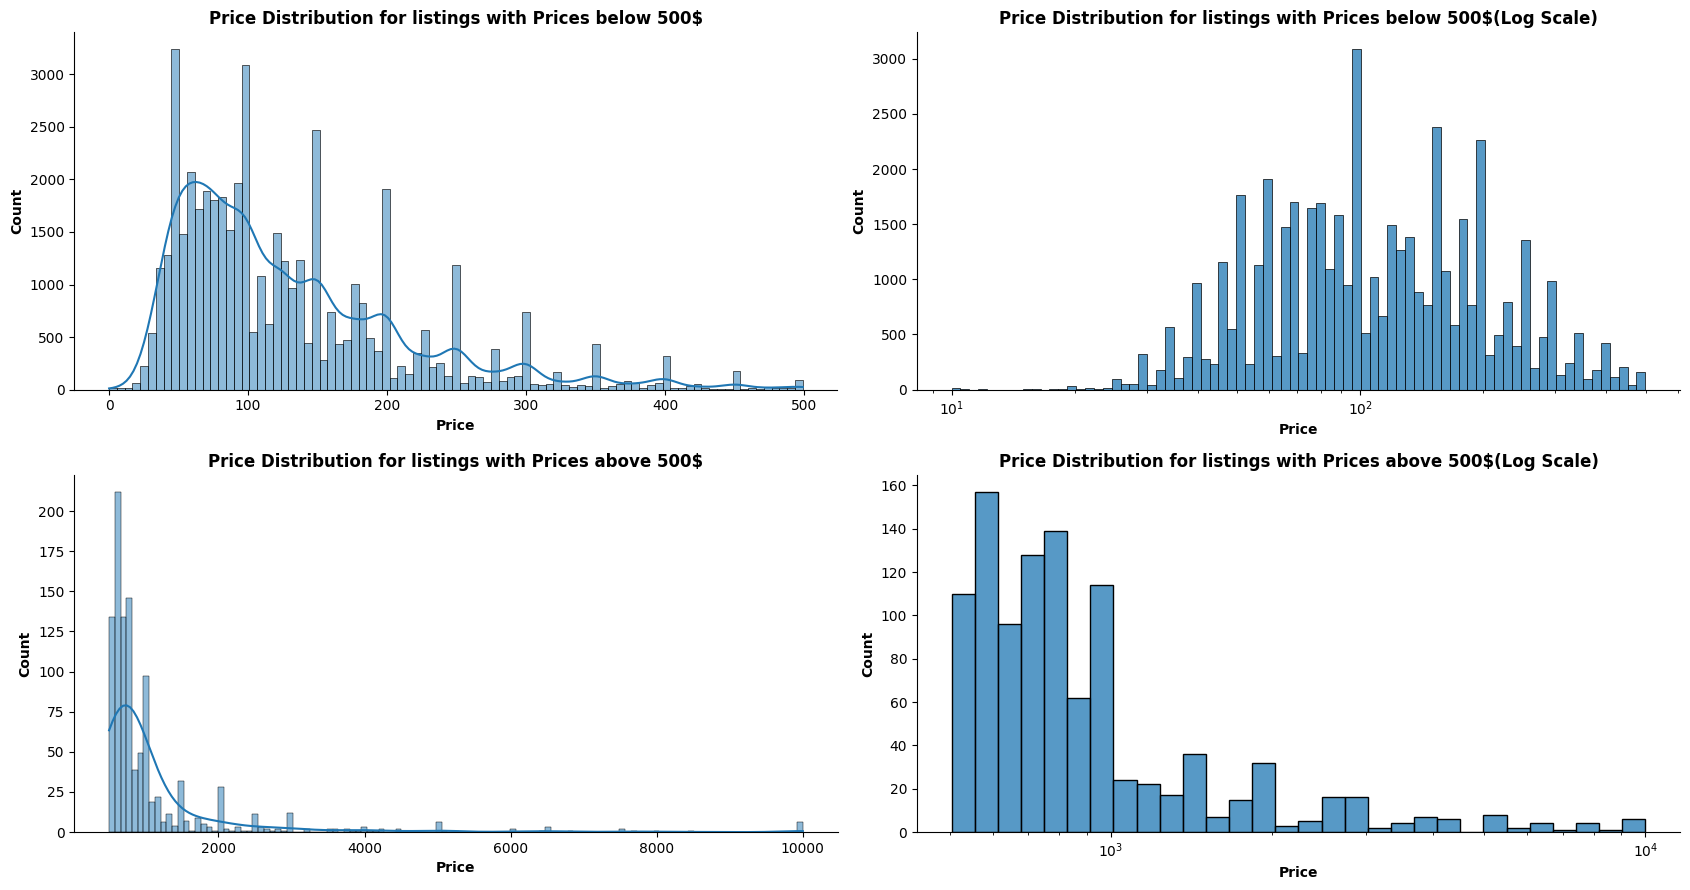

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(17, 9))

sns.histplot(df_original.loc[df_original['price'] < 500],
             x="price",
             ax=axes[0,0],
             kde=True)
axes[0,0].set_title('Price Distribution for listings with Prices below 500$', fontweight ='bold')
axes[0,0].set_xlabel('Price', fontweight ='bold')
axes[0,0].set_ylabel('Count', fontweight ='bold')

sns.histplot(df_original.loc[df_original['price'] < 500],
             x="price",
             ax=axes[0,1],
             log_scale=True,
             kde=False)
axes[0,1].set_title('Price Distribution for listings with Prices below 500$(Log Scale)', fontweight ='bold')
axes[0,1].set_xlabel('Price', fontweight ='bold')
axes[0,1].set_ylabel('Count', fontweight ='bold')


sns.histplot(df_original.loc[df_original['price'] > 500],
             x="price",
             ax=axes[1,0],
             kde=True)
axes[1,0].set_title('Price Distribution for listings with Prices above 500$', fontweight ='bold')
axes[1,0].set_xlabel('Price', fontweight ='bold')
axes[1,0].set_ylabel('Count', fontweight ='bold')

sns.histplot(df_original.loc[df_original['price'] > 500],
             x="price",
             ax=axes[1,1],
             log_scale=True,
             kde=False)
axes[1,1].set_title('Price Distribution for listings with Prices above 500$(Log Scale)', fontweight ='bold')
axes[1,1].set_xlabel('Price', fontweight ='bold')
axes[1,1].set_ylabel('Count', fontweight ='bold')

sns.despine()
# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

***
Analyzing the price distribution of the dataset reveals that the majority of listings have prices below $500. The distribution curve exhibits a right-skewed pattern, suggesting that there are more extreme values on the higher end of the price scale compared to the lower end. This skewness implies the presence of outliers—specifically, a few listings with exceptionally high prices that influence the mean(avg. price), pulling it towards the higher end of the price spectrum.

Identifying these outliers is important for data analysis and decision-making processes. Outliers can distort statistical measures such as the mean and may obscure meaningful patterns or trends in the data. Therefore, it is essential to handle outliers appropriately, such as through data transformation, outlier removal, or using robust statistical methods that are less sensitive to extreme values.
***

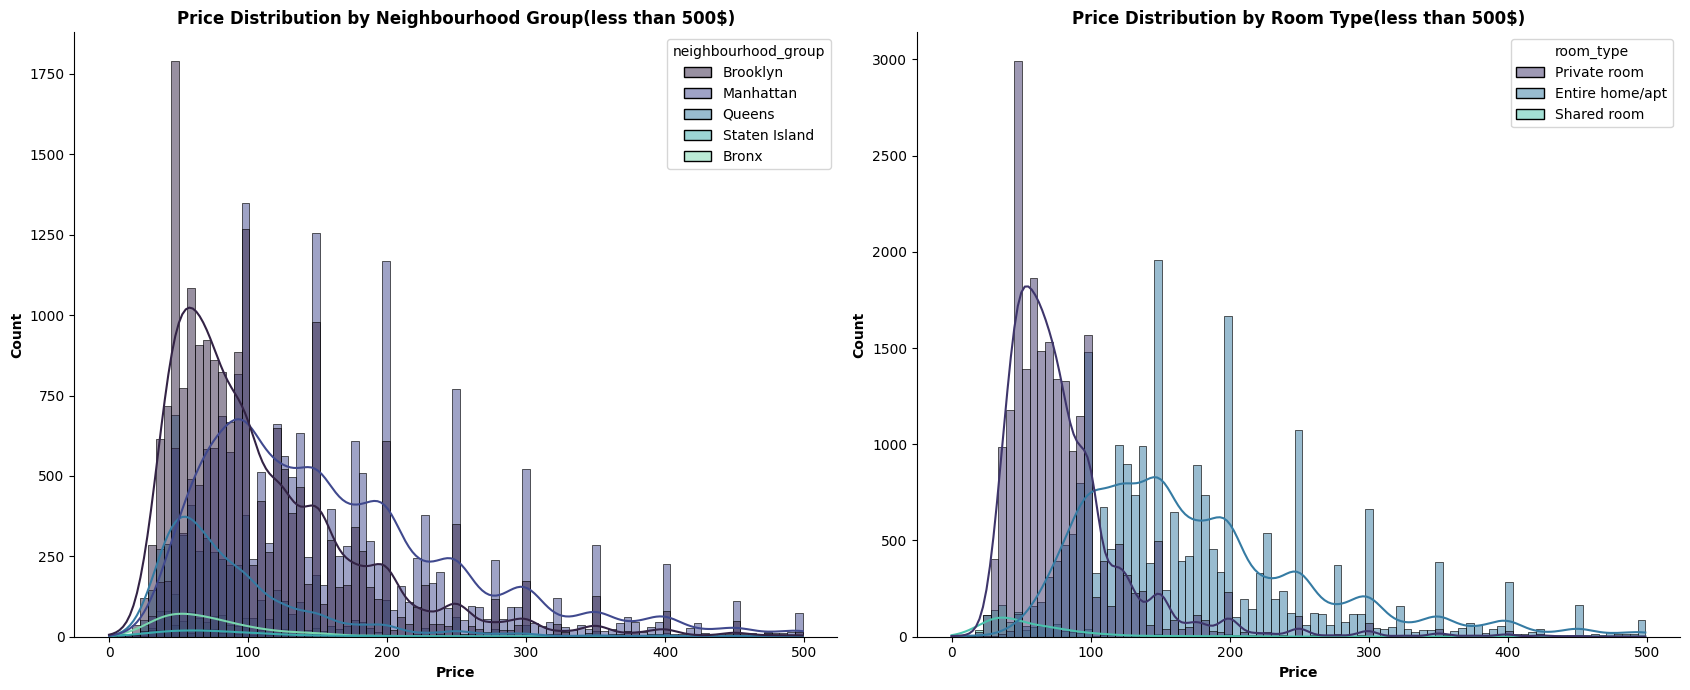

In [26]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 7))

sns.histplot(df_original.loc[df_original['price'] < 500],
             x="price",
             hue="neighbourhood_group",
             ax=axes[0],
             kde=True,
             palette="mako")
axes[0].set_title('Price Distribution by Neighbourhood Group(less than 500$)', fontweight ='bold')
axes[0].set_xlabel('Price', fontweight ='bold')
axes[0].set_ylabel('Count', fontweight ='bold')

sns.histplot(df_original.loc[df_original['price'] < 500],
             x="price",
             hue="room_type",
             ax=axes[1],
             kde=True,
             palette="mako")
axes[1].set_title('Price Distribution by Room Type(less than 500$)', fontweight ='bold')
axes[1].set_xlabel('Price', fontweight ='bold')
axes[1].set_ylabel('Count', fontweight ='bold')

sns.despine()
# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

***
Analyzing listings with prices below $500 reveals several insights:

* **Neighborhood Distribution:** Brooklyn has the highest number of listings with prices below **100**, followed by ***Manhattan***, ***Queens***, ***Bronx***, and ***Staten Island***. ***Manhattan***, being a popular neighborhood group, predominantly features listings priced between **90** and **200**. ***Queens***, ***Staten Island***, and ***Bronx*** also have a significant number of listings priced below **100**.

* **Room Type Distribution:** The majority of ***Private Rooms*** have prices below **100**. Similarly, ***Shared Rooms*** predominantly fall within the price range of less than **50**. In contrast, ***Entire Apartments*** have a wider price range, with most listings priced between ***90*** and ***200***, varying depending on the neighborhood and other factors.

These insights into the distribution of listings by price range and room type can inform pricing strategies, marketing efforts, and investment decisions for businesses in the hospitality industry. Understanding price patterns within different neighborhoods and room types enables businesses to better target their offerings to meet the preferences and budgets of potential guests, ultimately enhancing competitiveness and driving revenue growth.
***


#### **Chart 4.2: Density and Price Distribution of Neighbourhood Groups**

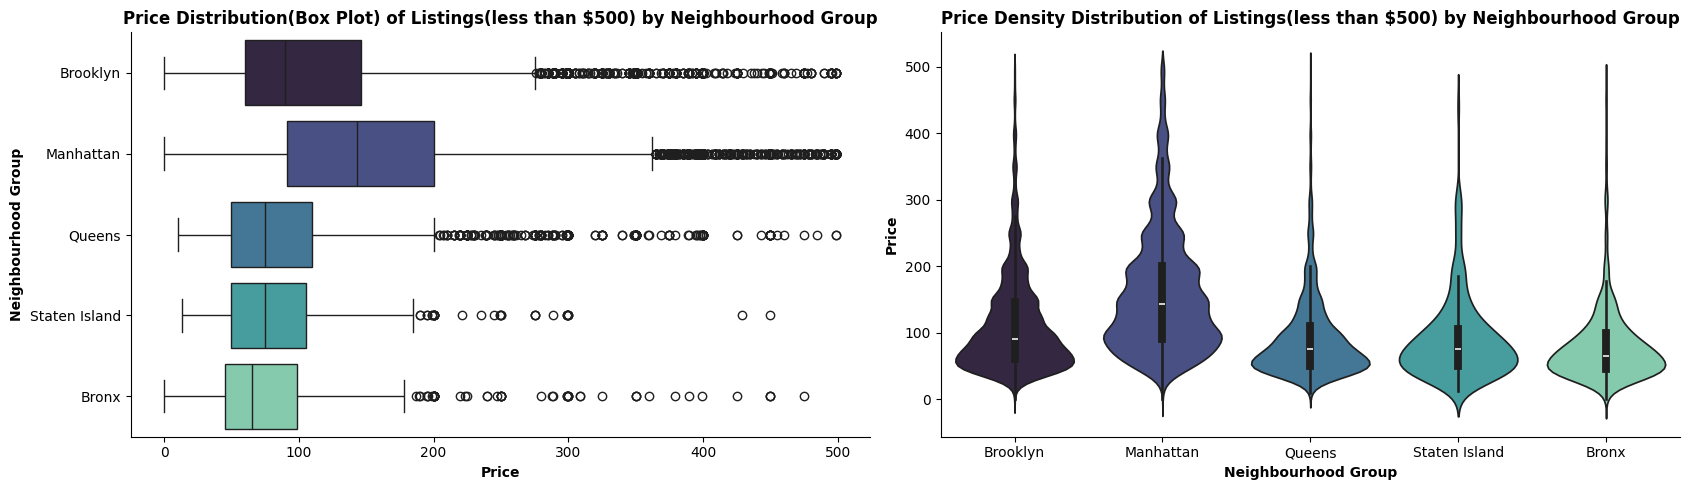

In [27]:
df = df_original.groupby(['neighbourhood_group', 'room_type'])[['price']].mean()

fig, axes = plt.subplots(ncols=2, figsize=(17, 5))

sns.boxplot(df_original.loc[df_original['price'] < 500],
            y="neighbourhood_group",
            x="price",
            orient="h",
            hue="neighbourhood_group",
            legend=False,
            ax=axes[0],
            palette="mako")
axes[0].set_title('Price Distribution(Box Plot) of Listings(less than $500) by Neighbourhood Group', fontweight ='bold')
axes[0].set_xlabel('Price', fontweight ='bold')
axes[0].set_ylabel('Neighbourhood Group', fontweight ='bold')

sns.violinplot(df_original.loc[df_original['price'] < 500],
               y="price",
               x="neighbourhood_group",
               hue="neighbourhood_group",
               legend=False,
               ax=axes[1],
               palette="mako")
axes[1].set_title('Price Density Distribution of Listings(less than $500) by Neighbourhood Group', fontweight ='bold')
axes[1].set_xlabel('Neighbourhood Group', fontweight ='bold')
axes[1].set_ylabel('Price', fontweight ='bold')

sns.despine()
# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

***
For listings with price less than $500:

* ***Brooklyn*** stands out with an average price for its listings hovering around **90-100**, with the majority of listings in the neighborhood group priced near **70-90**. ***Brooklyn*** is known for its diverse neighborhoods, vibrant cultural scene, and trendy attractions such as Prospect Park and Brooklyn Bridge. Its popularity among both residents and visitors contributes to the demand for accommodations, reflected in the pricing trends observed.

* ***Manhattan***, renowned as one of the most expensive places in the world to live, exhibits the highest range of prices for listings, with an average price of **~150**. Home to iconic landmarks such as Times Square, Central Park, and the Empire State Building, Manhattan attracts tourists, professionals, and residents alike. The high cost of living and premium real estate market in Manhattan translate into higher accommodation prices, consistent with the observed pricing distribution.

* ***Queens*** and ***Staten*** Island demonstrate similar distributions of prices, suggesting comparable affordability levels. ***Queens***, the largest borough in New York City, offers diverse neighborhoods, cultural attractions, and culinary experiences, contributing to its popularity among residents and visitors. Staten Island, known for its suburban feel, parks, and waterfront views, offers a quieter alternative to the bustling city life of Manhattan and Brooklyn.

* ***Bronx*** emerges as the most affordable option among the boroughs, with a lower standard of living compared to Manhattan and some parts of Brooklyn. Despite its affordability, the Bronx boasts attractions such as the Bronx Zoo, Yankee Stadium, and the New York Botanical Garden, making it an appealing destination for visitors seeking cultural experiences and outdoor activities at a more budget-friendly price point.
***

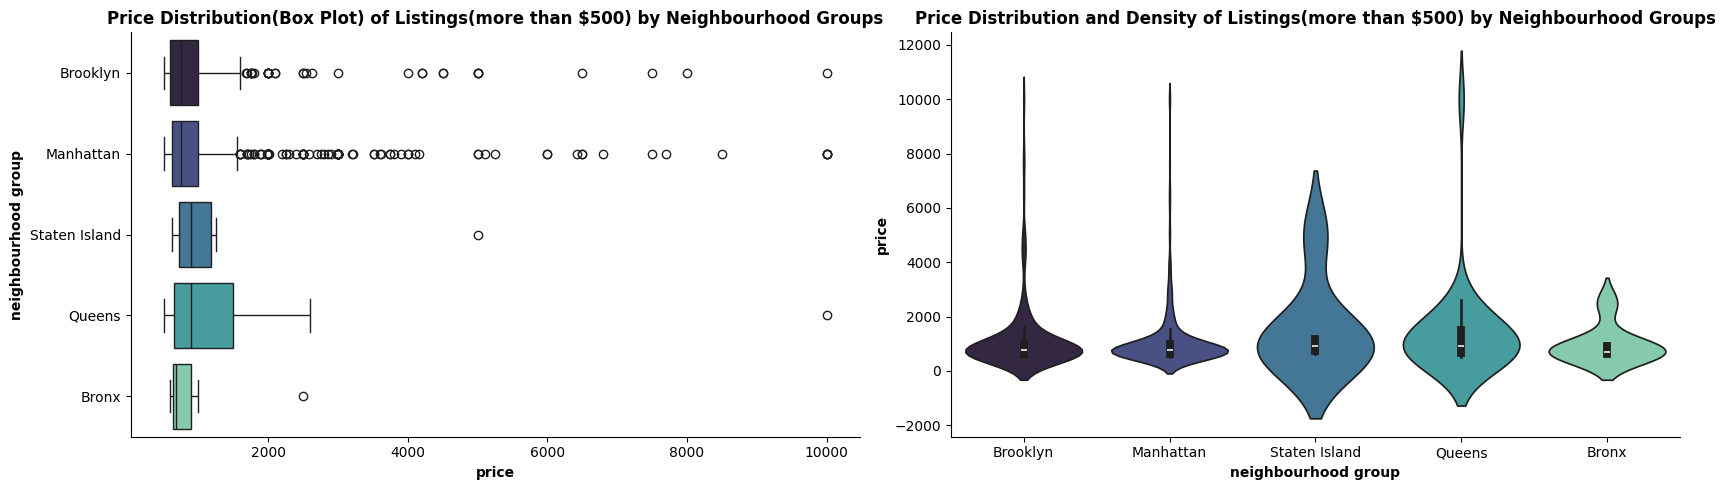

In [28]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 5))

sns.boxplot(df_original.loc[df_original['price'] > 500],
            y="neighbourhood_group",
            x="price",
            orient="h",
            hue="neighbourhood_group",
            legend=False,
            ax=axes[0],
            palette="mako")
axes[0].set_title('Price Distribution(Box Plot) of Listings(more than $500) by Neighbourhood Groups', fontweight ='bold')
axes[0].set_xlabel('price', fontweight ='bold')
axes[0].set_ylabel('neighbourhood group', fontweight ='bold')

sns.violinplot(df_original.loc[df_original['price'] > 500],
               y="price",
               x="neighbourhood_group",
               hue="neighbourhood_group",
               legend=False,
               ax=axes[1],
               palette="mako")
axes[1].set_title('Price Distribution and Density of Listings(more than $500) by Neighbourhood Groups', fontweight ='bold')
axes[1].set_xlabel('neighbourhood group', fontweight ='bold')
axes[1].set_ylabel('price', fontweight ='bold')

sns.despine()
# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

***
For listings with price more than $500:

* **Outliers in Brooklyn and Manhattan:** Both ***Brooklyn*** and ***Manhattan*** exhibit a significant number of outliers, with listings priced above 10,**000**. This phenomenon is not uncommon, given the diverse range of properties available in these boroughs, including luxury apartments, penthouses, and upscale accommodations catering to affluent clientele and high-end markets.

* **Queens Variation in Price Range:** ***Queens*** showcases the highest range of prices for listings priced above **500**. This variability is expected, considering ***Queens***' status as the largest neighborhood group in NYC, encompassing diverse neighborhoods with varying demographics, amenities, and housing options. The wide range of prices reflects the diverse array of accommodations available throughout the borough, catering to different preferences and budgets.

* **Average Prices for Listings above $500:** Interestingly, for listings priced above **500**, the average prices in ***Brooklyn***, ***Manhattan***, and ***Bronx*** are lower compared to ***Staten Island*** and ***Queens***. Despite having lower guest counts, ***Staten Island*** and ***Queens*** exhibit higher average prices for these premium listings.

This discrepancy may be attributed to factors such as the availability of luxury properties, unique amenities, and exclusive neighborhoods in these boroughs, attracting guests willing to pay premium prices for exceptional accommodations.
***

#### **Chart 4.3: Price Distribution of Room Type by Neighbourhood Groups**

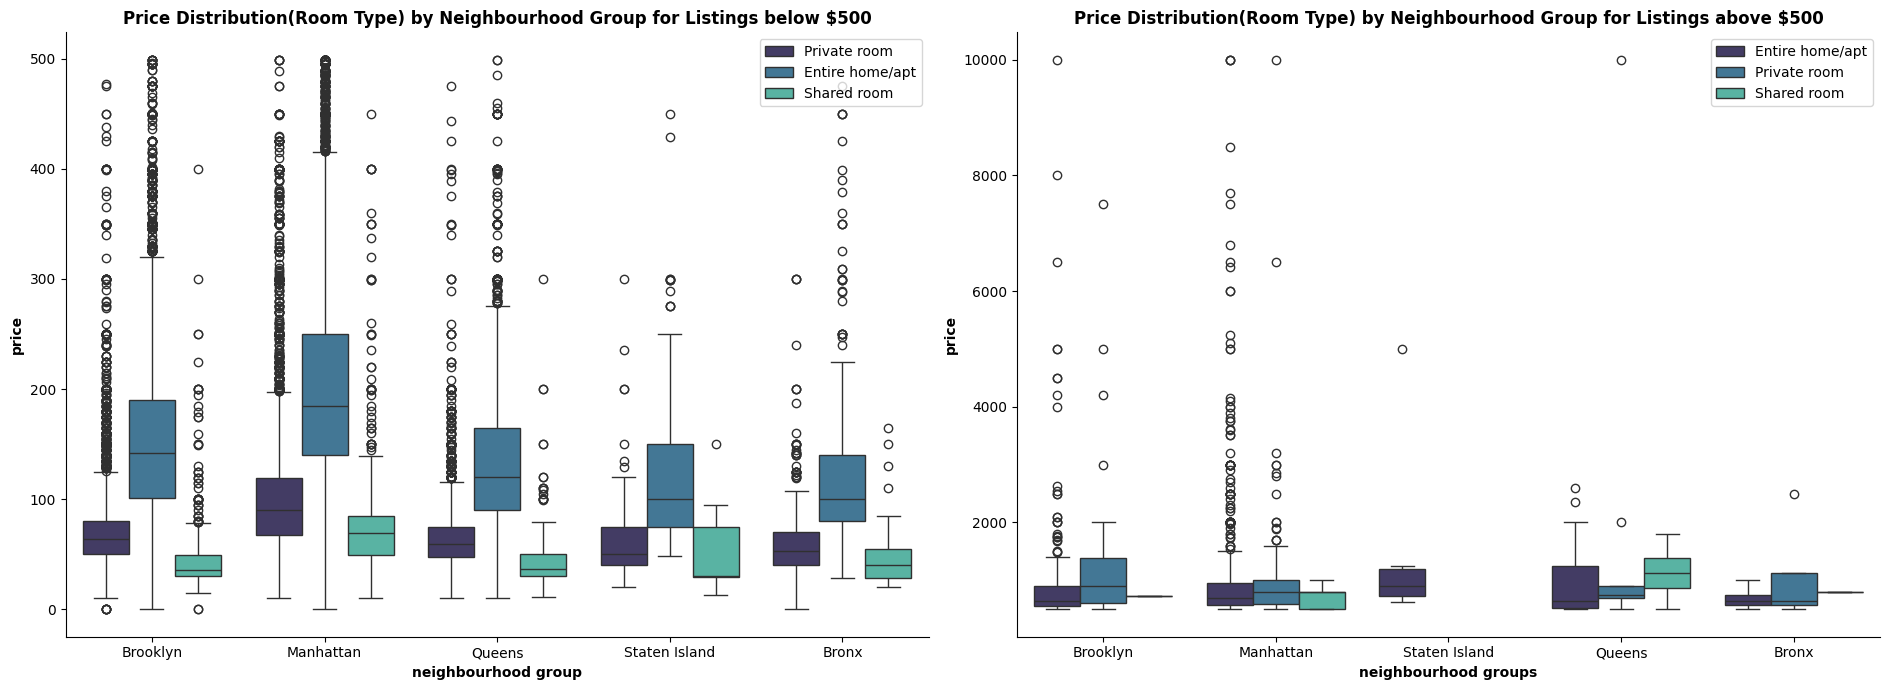

In [29]:
fig, axes = plt.subplots(ncols=2, figsize=(19, 7))

sns.boxplot(df_original.loc[df_original['price'] < 500],
            y="price",
            x="neighbourhood_group",
            hue="room_type",
            ax=axes[0],
            palette="mako")
axes[0].set_title('Price Distribution(Room Type) by Neighbourhood Group for Listings below $500', fontweight ='bold')
axes[0].set_xlabel('neighbourhood group', fontweight ='bold')
axes[0].set_ylabel('price', fontweight ='bold')
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, labels)

sns.boxplot(df_original.loc[df_original['price'] >= 500],
            y="price",
            x="neighbourhood_group",
            hue="room_type",
            ax=axes[1],
            palette="mako")
axes[1].set_title('Price Distribution(Room Type) by Neighbourhood Group for Listings above $500', fontweight ='bold')
axes[1].set_xlabel('neighbourhood groups', fontweight ='bold')
axes[1].set_ylabel('price', fontweight ='bold')
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels)

sns.despine()
# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

***
From the provided visualization, the price distribution of each neighborhood group by room type reveals several key insights:

* **Private Room:**
  * ***Manhattan*** has the highest average prices for private rooms, followed by ***Brooklyn***, ***Queens***, ***Bronx***, and ***Staten Island*** for listings with prices below **500**.
  * For listings with prices above **$500**, S***taten Island*** surprisingly has the highest average prices for private rooms, followed by ***Manhattan***, ***Brooklyn***, ***Bronx***, and ***Queens***.
  * Both ***Manhattan*** and ***Brooklyn*** exhibit a significant number of outliers, indicating a wide range of pricing options and potentially higher-end accommodations available in these boroughs.

* **Entire Apartment:**

  * ***Manhattan*** boasts the highest average prices for entire apartment listings, followed by ***Brooklyn***, ***Queens***, ***Bronx***, and ***Staten Island.***
  * ***Manhattan*** offers the highest range of options for prices, indicating a diverse array of accommodations catering to different budgets and preferences.
  * ***Brooklyn*** stands out with higher average prices for listings priced above **$500** compared to ***Manhattan***, indicating a notable presence of upscale properties and luxury accommodations in this borough.

* **Shared Room:**

  * **Shared rooms** have the lowest avg. prices compared to the other two room types. ***Manhattan*** seems to have the highest mean prices for shared rooms, followed by ***Queens***, ***Bronx***, ***Brooklyn***, and ***Staten Island.***

  * There are a lot of outliers present in ***Brooklyn*** and ***Manhattan*** for shared rooms.

  * There are no shared rooms in ***Staten Island*** for price more than **500**. ***Queens***, on the other hand a lot of shared rooms with prices above $**500**.


From the provided visualization, it's evident that across all neighborhood groups, the prices of booking or renting entire apartments are consistently higher compared to booking a shared room or a private room. This observation holds true regardless of the neighborhood, indicating a general trend in pricing across different room types.

This aligns with previous insights, where we observed that ***Manhattan*** tends to have the highest average prices for entire apartment listings, followed by ***Brooklyn***, ***Queens***, ***Bronx***, and ***Staten Island.*** Similarly, private rooms in Manhattan are also priced higher on average compared to other neighborhood groups.

The higher prices for entire apartments may be attributed to several factors, including the larger size and greater privacy offered by entire apartments compared to shared or private rooms. Additionally, entire apartments may come with additional amenities and features, contributing to their premium pricing.

Understanding these pricing dynamics is essential for businesses in the hospitality industry to effectively position their offerings and optimize revenue.
***

#### **Chart 4.4: Price Distribution of each Neighbourhood**

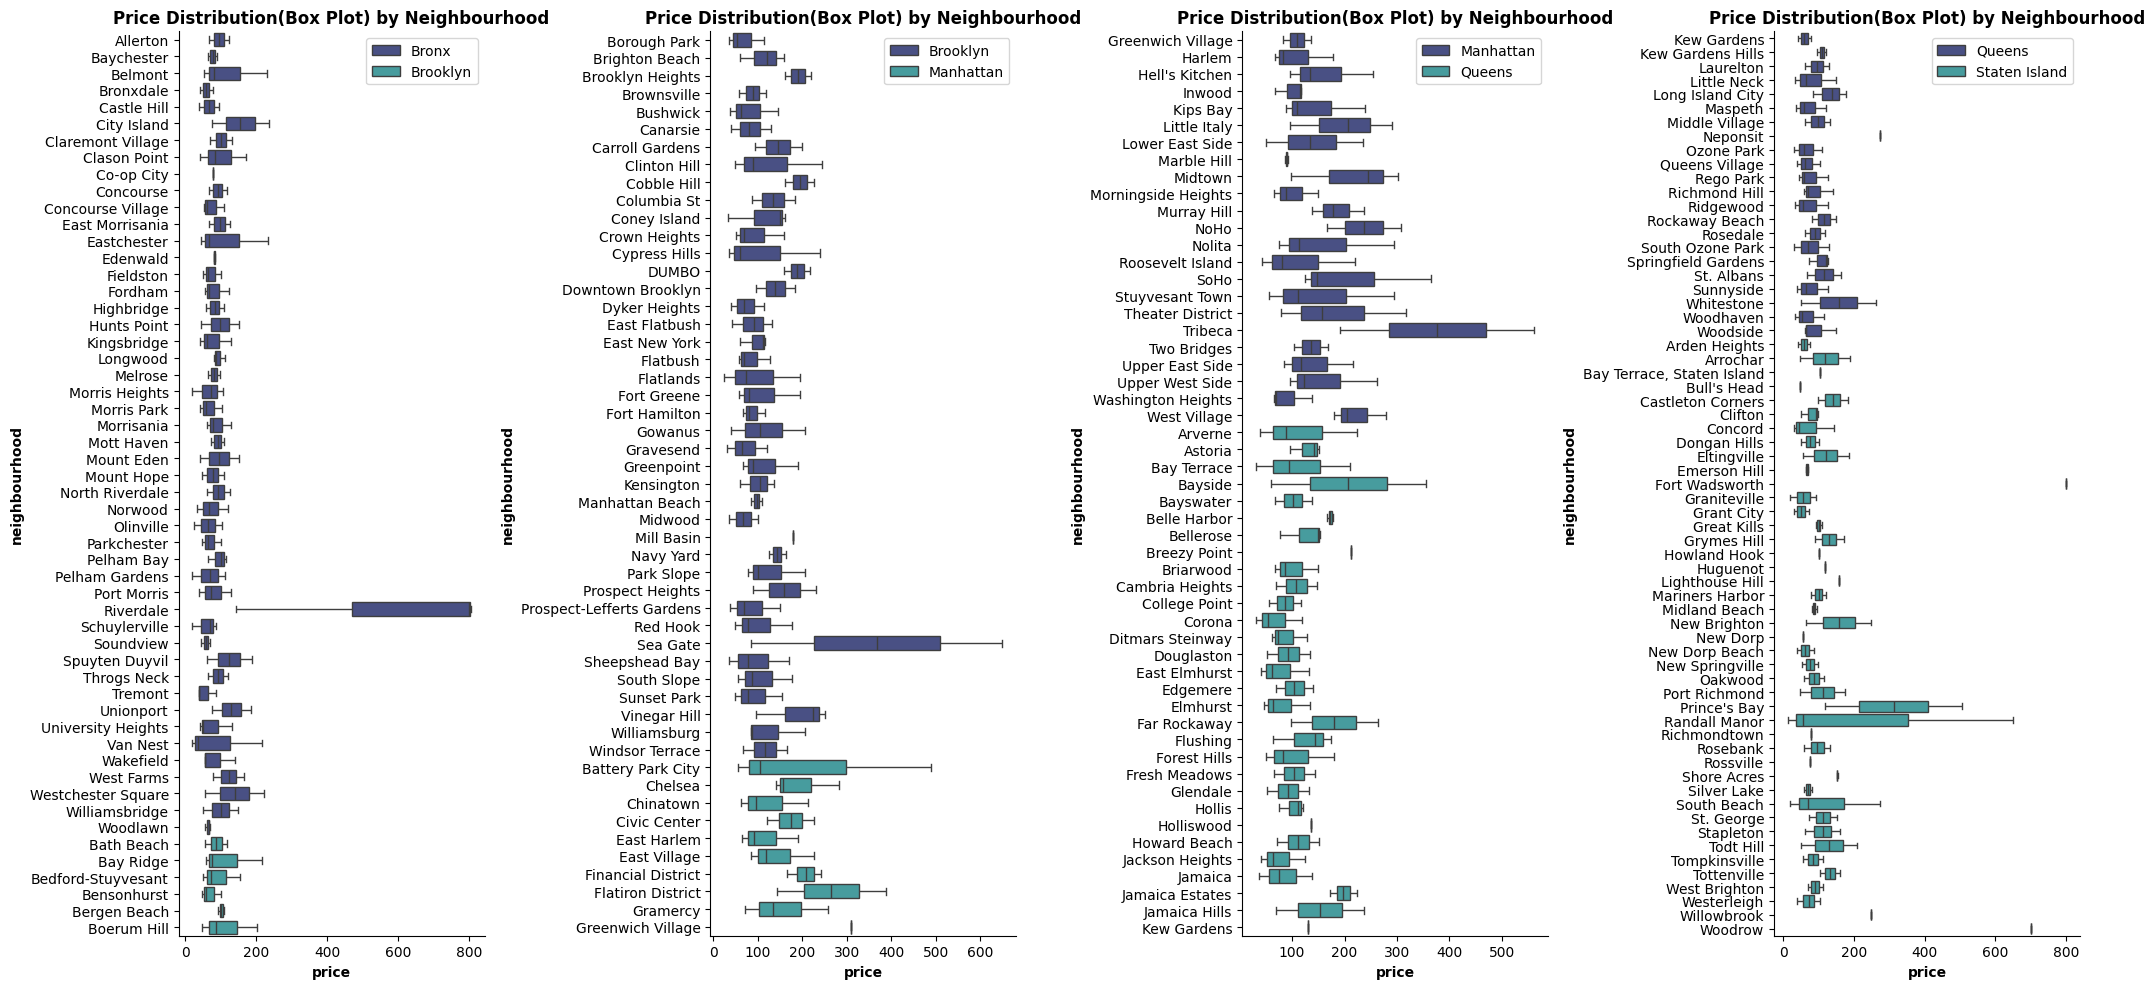

In [30]:
df = df_original.groupby(['neighbourhood_group', 'neighbourhood', 'room_type'])[['price']].mean()
fig, axes = plt.subplots(ncols=4, figsize=(21, 10))

sns.boxplot(df[:135],
            y="neighbourhood",
            x="price",
            orient="h",
            hue="neighbourhood_group",
            ax=axes[0],
            legend=True,
            palette="mako")
axes[0].set_title('Price Distribution(Box Plot) by Neighbourhood', fontweight ='bold')
axes[0].set_xlabel('price', fontweight ='bold')
axes[0].set_ylabel('neighbourhood', fontweight ='bold')
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, labels)

sns.boxplot(df[135:270],
            y="neighbourhood",
            x="price",
            orient="h",
            hue="neighbourhood_group",
            ax=axes[1],
            legend=True,
            palette="mako")
axes[1].set_title('Price Distribution(Box Plot) by Neighbourhood', fontweight ='bold')
axes[1].set_xlabel('price', fontweight ='bold')
axes[1].set_ylabel('neighbourhood', fontweight ='bold')
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels)

sns.boxplot(df[270:405],
            y="neighbourhood",
            x="price",
            orient="h",
            hue="neighbourhood_group",
            ax=axes[2],
            legend=True,
            palette="mako")
axes[2].set_title('Price Distribution(Box Plot) by Neighbourhood', fontweight ='bold')
axes[2].set_xlabel('price', fontweight ='bold')
axes[2].set_ylabel('neighbourhood', fontweight ='bold')
handles, labels = axes[2].get_legend_handles_labels()
axes[2].legend(handles, labels)

sns.boxplot(df[405:],
            y="neighbourhood",
            x="price",
            orient="h",
            hue="neighbourhood_group",
            ax=axes[3],
            legend=True,
            palette="mako")
axes[3].set_title('Price Distribution(Box Plot) by Neighbourhood', fontweight ='bold')
axes[3].set_xlabel('price', fontweight ='bold')
axes[3].set_ylabel('neighbourhood', fontweight ='bold')
handles, labels = axes[3].get_legend_handles_labels()
axes[3].legend(handles, labels)

sns.despine()
# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

***
The visualization provided illustrates the price distribution across all neighborhoods present in our dataset, revealing insights into the neighborhoods with higher mean prices and wider price ranges:

* Neighborhoods such as ***Riverdale***, ***Sea Gate***, ***Tribeca***, ***Bayside***, and ***Prince's Bay*** exhibit higher average prices compared to other neighborhoods. These areas likely offer premium accommodations, desirable amenities, or unique attractions that justify their higher pricing.

* Analyzing the average prices of neighborhoods enables businesses to evaluate and refine their pricing strategies accordingly. By understanding the price dynamics of different neighborhoods, businesses can adjust their pricing strategies to remain competitive, attract target customers, and maximize revenue potential.

Overall, this analysis of neighborhood price distributions provides valuable insights for businesses in the hospitality industry to optimize pricing strategies, enhance competitiveness, and meet the needs and preferences of their target market effectively.
***

#### **Chart 4.5: Neighbourhoods with Highest and Least Avg. Prices by Room Types**

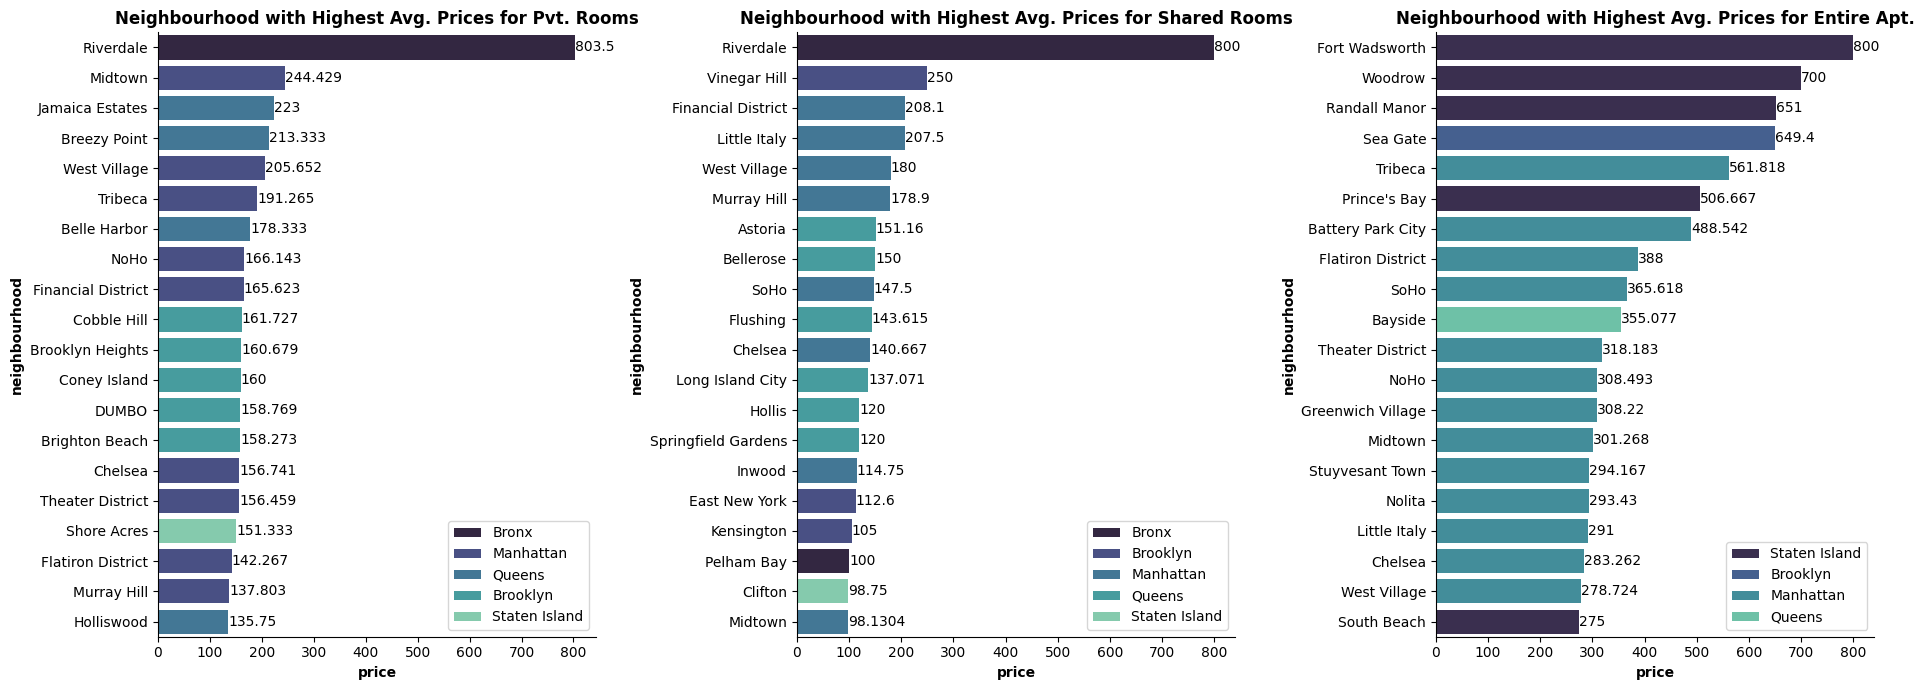

In [31]:
room_one = df_original.loc[df_original['room_type'] == 'Private room'].groupby(['neighbourhood_group', 'neighbourhood'])[['price']].mean().sort_values(by='price', ascending=False).head(20)
room_two = df_original.loc[df_original['room_type'] == 'Shared room'].groupby(['neighbourhood_group', 'neighbourhood'])[['price']].mean().sort_values(by='price', ascending=False).head(20)
room_three = df_original.loc[df_original['room_type'] == 'Entire home/apt'].groupby(['neighbourhood_group','neighbourhood'])[['price']].mean().sort_values(by='price', ascending=False).head(20)

fig, axes = plt.subplots(ncols=3, figsize=(19, 7))

sns.barplot(room_one,
            x="price",
            y="neighbourhood",
            hue="neighbourhood_group",
            ax=axes[0],
            legend=True,
            palette="mako")
axes[0].set_title('Neighbourhood with Highest Avg. Prices for Pvt. Rooms', fontweight ='bold')
axes[0].set_xlabel('price', fontweight ='bold')
axes[0].set_ylabel('neighbourhood', fontweight ='bold')
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, labels)
for container in axes[0].containers:
    axes[0].bar_label(container)

sns.barplot(room_two,
            x="price",
            y="neighbourhood",
            hue="neighbourhood_group",
            ax=axes[1],
            legend=True,
            palette="mako")
axes[1].set_title('Neighbourhood with Highest Avg. Prices for Shared Rooms', fontweight ='bold')
axes[1].set_xlabel('price', fontweight ='bold')
axes[1].set_ylabel('neighbourhood', fontweight ='bold')
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels)
for container in axes[1].containers:
    axes[1].bar_label(container)

sns.barplot(room_three,
            x="price",
            y="neighbourhood",
            hue="neighbourhood_group",
            ax=axes[2],
            legend=True,
            palette="mako")
axes[2].set_title('Neighbourhood with Highest Avg. Prices for Entire Apt.', fontweight ='bold')
axes[2].set_xlabel('price', fontweight ='bold')
axes[2].set_ylabel('neighbourhood', fontweight ='bold')
handles, labels = axes[2].get_legend_handles_labels()
axes[2].legend(handles, labels)
for container in axes[2].containers:
    axes[2].bar_label(container)

sns.despine()
# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

***
From the visualization, several insights can be gleaned:

* **Private Rooms:**

  * **Riverdale** in the ***Bronx*** stands out with the highest mean prices for private rooms, suggesting a potentially upscale or exclusive housing market in this neighborhood.
  
  * **Midtown** in ***Manhattan*** and **Jamaica Estate** in ***Queens*** also have relatively high average prices for private rooms, ranging from 220 to 250. However, **Riverdale's** prices appear to be significantly higher, possibly indicating outliers or unique factors influencing pricing in this neighborhood.

* **Shared Rooms:**

  * Similar to private rooms, **Riverdale** in the ***Bronx*** exhibits the highest mean prices for shared rooms as well. **Vinegar Hill** in ***Brooklyn*** follows with the next highest mean prices.

  * It's worth noting that shared room listings are relatively scarce in the dataset, which may impact the reliability of these insights. Further exploration is needed to validate these findings and understand the factors driving pricing in these neighborhoods.

* **Entire Apartments:**

  * **Fort Wadsworth**, **Woodrow**, and **Randall Manor** in ***Staten Island*** surprisingly have the highest average prices for renting entire apartments. This contrasts with the generally lower average prices observed for entire apartments in ***Staten Island*** and ***Bronx.***

  * This finding is unexpected and may warrant further investigation to understand the underlying factors contributing to the higher prices in these specific neighborhoods within ***Staten Island***.

Most of the listings above are present in the neighbourhood groups of ***Manhattan*** and ***Brooklyn***.
***

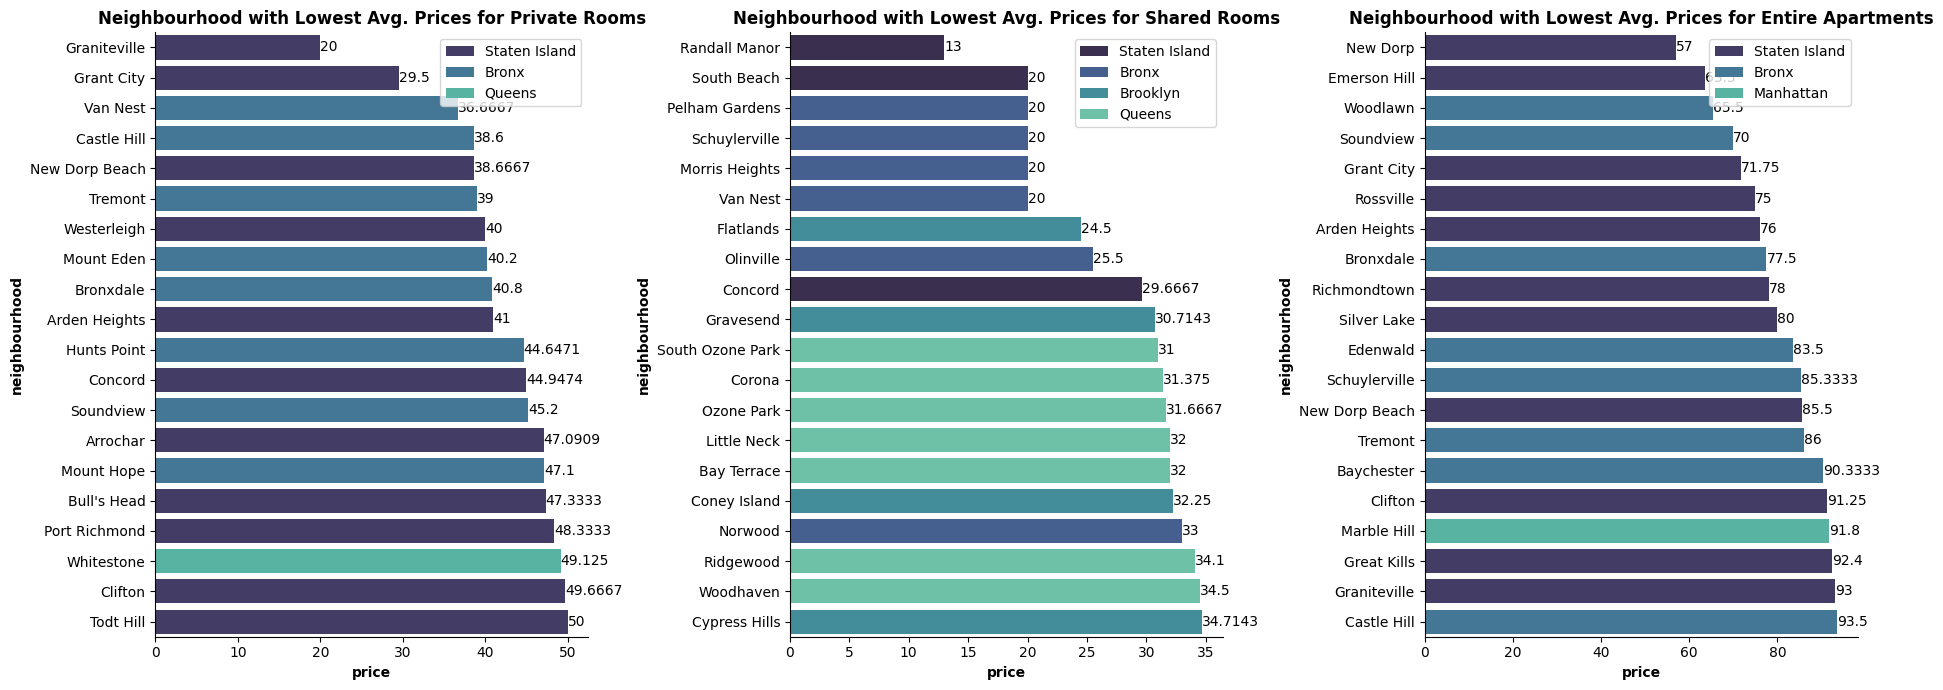

In [32]:
room_one = df_original.loc[df_original['room_type'] == 'Private room'].groupby(['neighbourhood_group', 'neighbourhood'])[['price']].mean().sort_values(by='price', ascending=True).head(20)
room_two = df_original.loc[df_original['room_type'] == 'Shared room'].groupby(['neighbourhood_group', 'neighbourhood'])[['price']].mean().sort_values(by='price', ascending=True).head(20)
room_three = df_original.loc[df_original['room_type'] == 'Entire home/apt'].groupby(['neighbourhood_group','neighbourhood'])[['price']].mean().sort_values(by='price', ascending=True).head(20)

fig, axes = plt.subplots(ncols=3, figsize=(19, 7))

sns.barplot(room_one,
            x="price",
            y="neighbourhood",
            hue="neighbourhood_group",
            ax=axes[0],
            legend=True,
            palette="mako")
axes[0].set_title('Neighbourhood with Lowest Avg. Prices for Private Rooms', fontweight ='bold')
axes[0].set_xlabel('price', fontweight ='bold')
axes[0].set_ylabel('neighbourhood', fontweight ='bold')
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, labels)
for container in axes[0].containers:
    axes[0].bar_label(container)

sns.barplot(room_two,
            x="price",
            y="neighbourhood",
            hue="neighbourhood_group",
            ax=axes[1],
            legend=True,
            palette="mako")
axes[1].set_title('Neighbourhood with Lowest Avg. Prices for Shared Rooms', fontweight ='bold')
axes[1].set_xlabel('price', fontweight ='bold')
axes[1].set_ylabel('neighbourhood', fontweight ='bold')
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels)
for container in axes[1].containers:
    axes[1].bar_label(container)

sns.barplot(room_three,
            x="price",
            y="neighbourhood",
            hue="neighbourhood_group",
            ax=axes[2],
            legend=True,
            palette="mako")
axes[2].set_title('Neighbourhood with Lowest Avg. Prices for Entire Apartments', fontweight ='bold')
axes[2].set_xlabel('price', fontweight ='bold')
axes[2].set_ylabel('neighbourhood', fontweight ='bold')
handles, labels = axes[2].get_legend_handles_labels()
axes[2].legend(handles, labels)
for container in axes[2].containers:
    axes[2].bar_label(container)

sns.despine()
# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

***
From the above visualization, several insights can be derived:

* **Private Rooms:**

  * Neighborhoods in ***Staten Island*** consistently exhibit the lowest average prices among the listings for private rooms.

  * Interestingly, none of the neighborhoods from ***Manhattan*** and ***Brooklyn*** appear in the top 20 neighborhoods with the least average prices for private rooms. This suggests that private room accommodations in these boroughs may generally command higher prices compared to other areas in NYC.

* **Shared Rooms:**

  * ***Queens*** and ***Bronx*** stand out with a higher count of neighborhoods offering shared rooms at lower average prices.

  * **Randall Manor** in ***Staten Island*** emerges with the lowest average price for shared rooms in NYC, indicating affordability in this particular neighborhood for this room type.

* **Entire Apartments:**

  * ***Staten Island*** and ***Bronx*** are observed to offer listings with the lowest average prices for renting an entire apartment.

  * This finding underscores the potential for more budget-friendly accommodation options in these boroughs, which may appeal to guests seeking cost-effective lodging solutions.
***

#### **Will the gained insights help creating a positive business impact?**

Businesses can use these insights to develop more informed and effective pricing strategies. By understanding the average prices and pricing trends in different neighborhoods and for different room types, businesses can adjust their pricing to remain competitive while maximizing revenue potential. Knowledge of pricing variations across neighborhoods allows businesses to tailor their marketing efforts to target specific demographics or customer segments.

Armed with insights into pricing dynamics, businesses can better position themselves against competitors. By offering competitive pricing or highlighting unique value propositions in certain neighborhoods or room types, businesses can differentiate themselves and attract more customers. Understanding pricing trends can help businesses optimize revenue management strategies. By strategically adjusting prices based on factors such as seasonality, demand fluctuations, and competitor pricing, businesses can maximize revenue and profitability.

Providing transparent and competitive pricing can enhance customer satisfaction and loyalty. By offering fair pricing and accurately reflecting the value proposition of their accommodations, businesses can build trust with customers and encourage repeat bookings and positive reviews.
***

### **Analyzing Minimun Nights and Calculated Host Listings Count**

Analyzing guest booking behavior can enable Airbnb hosts and property managers to tailor their offerings, pricing, and services to better meet the needs of their target audience, leading to increased bookings, higher guest satisfaction, and ultimately, a positive impact on business performance.

#### **Chart 5.1: Minimum Nights and Guest Count**

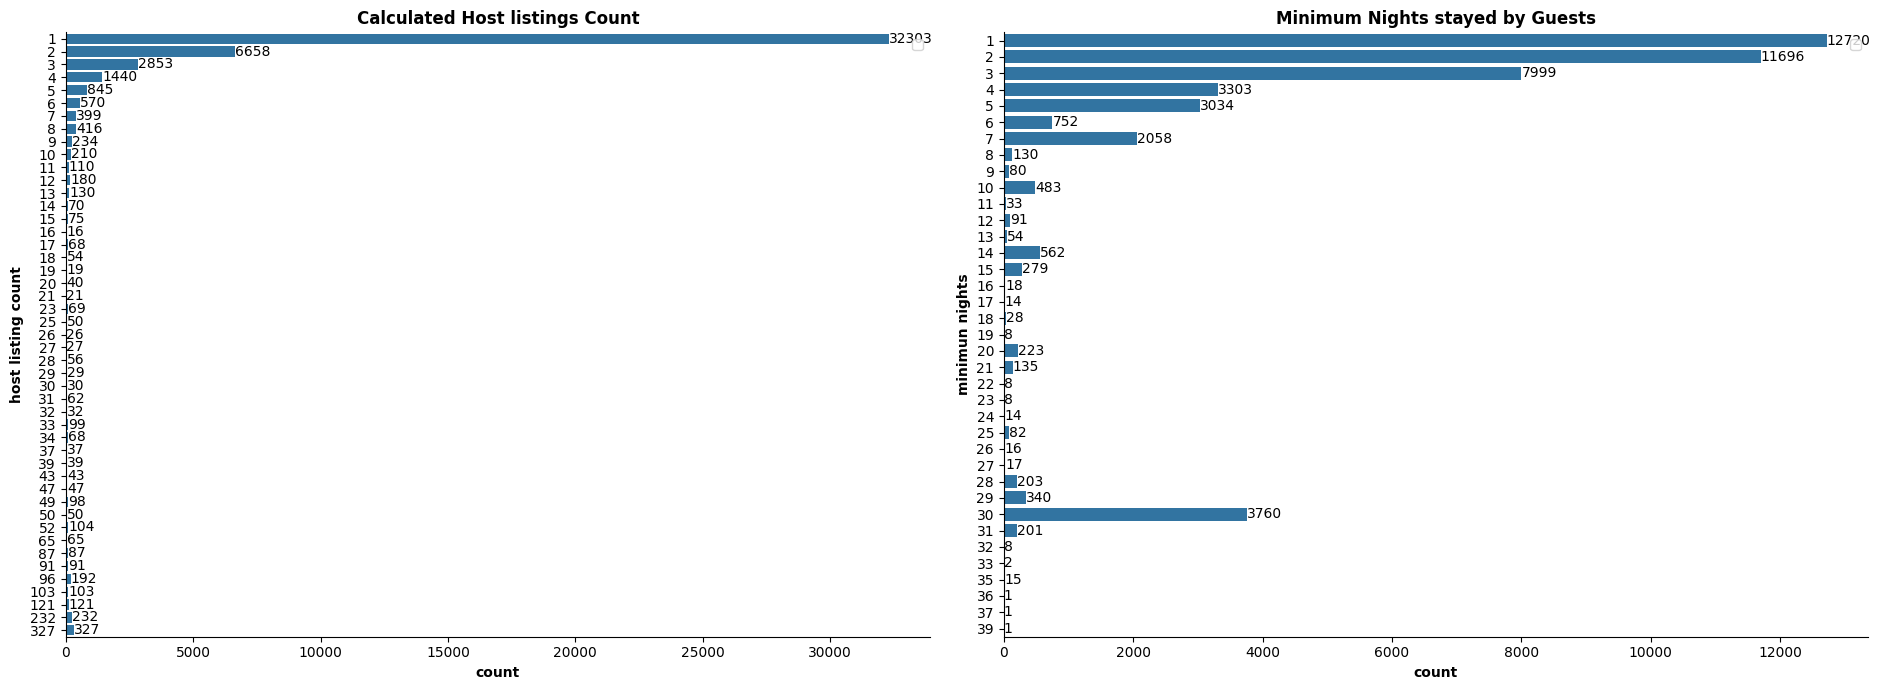

In [33]:
fig, axes = plt.subplots(ncols=2, figsize=(19, 7))

sns.countplot(df_original,
              y="calculated_host_listings_count",
              ax=axes[0],
              orient="h")
axes[0].set_title('Calculated Host listings Count', fontweight ='bold')
axes[0].set_xlabel('count', fontweight ='bold')
axes[0].set_ylabel('host listing count', fontweight ='bold')
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, labels)
for container in axes[0].containers:
    axes[0].bar_label(container)

sns.countplot(df_original.loc[df_original['minimum_nights'] < 40],
              y="minimum_nights",
              ax=axes[1],
              orient="h")
axes[1].set_title('Minimum Nights stayed by Guests', fontweight ='bold')
axes[1].set_xlabel('count', fontweight ='bold')
axes[1].set_ylabel('minimun nights', fontweight ='bold')
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels)
for container in axes[1].containers:
    axes[1].bar_label(container)

sns.despine()
# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

***
From the above visualization, several patterns in guest booking behavior emerge:

* **Duration of Stay:**
  
  * The majority of guests in our dataset tend to book accommodations for short durations, typically ranging from 1 to 7 days. There is a notable presence of guests who book for just one night, suggesting a significant proportion of short-term stays.
  
  * Additionally, there is a notable cluster of guests booking accommodations for nearly a month, indicating a demand for longer-term rentals among certain travelers.

* **Group Size:**

  * The data suggests that most guests book accommodations for themselves or small groups, with the majority of bookings catering to 1 to 6 people. Single guests are particularly prevalent, indicating a preference for solo travel or individual stays.
***

#### **Will the gained insights help creating a positive business impact?**

Hosts can optimize their Airbnb listings based on the observed preferences of guests, such as offering flexible booking durations to accommodate short-term and longer-term stays. Understanding the typical duration of stays can help hosts develop more effective pricing strategies. By offering competitive pricing that aligns with guest booking behavior, hosts can attract more guests and maximize revenue potential.

By catering to the needs and preferences of guests, hosts can enhance the overall guest experience and increase guest satisfaction. For example, hosts may provide amenities or services tailored to guests staying for longer durations, such as weekly cleaning services or discounts for extended stays. By prioritizing guest comfort and convenience, hosts can earn positive reviews and build a strong reputation, leading to repeat bookings and referrals. By optimizing their listings and pricing strategies based on guest booking behavior, hosts can increase occupancy rates and generate higher revenue. By attracting guests who prefer the booking durations and group sizes offered, hosts can ensure consistent bookings and maximize income from their Airbnb properties.
***

### **Correlation Heatmap**

A correlation plot, also known as a correlation matrix or heatmap, is a graphical representation of the correlation between variables in a dataset. Each cell in the plot represents the correlation coefficient between two variables, typically ranging from -1 to 1. The correlation coefficient quantifies the strength and direction of the relationship between two variables:

* If the correlation coefficient is close to 1, it indicates a strong positive correlation, meaning that as one variable increases, the other variable tends to increase as well.

* If the correlation coefficient is close to -1, it indicates a strong negative correlation, meaning that as one variable increases, the other variable tends to decrease.

* If the correlation coefficient is close to 0, it indicates little to no linear relationship between the variables.

<Axes: >

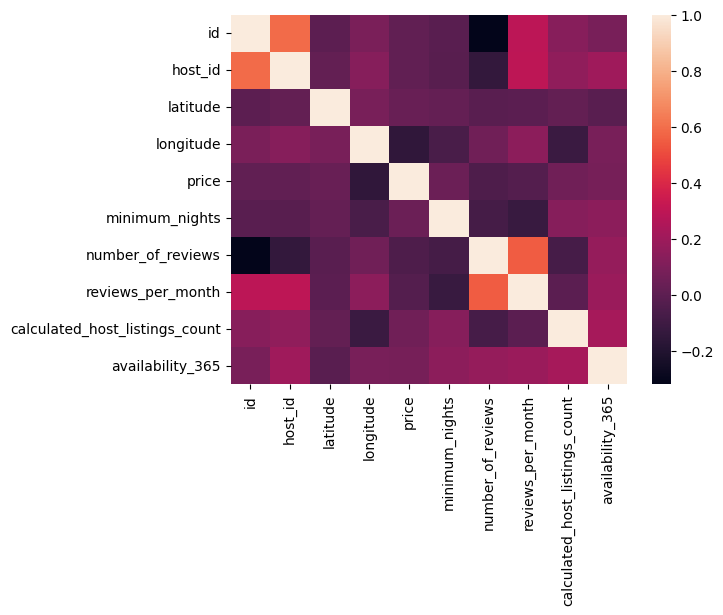

In [34]:
# Correlation Heatmap visualization code
# calculate the correlation matrix on the numeric columns
corr = df_original.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

### **Pair Plot**

A pair plot, also known as a scatterplot matrix, is a grid of scatterplots representing the pairwise relationships between variables in a dataset. Each scatterplot in the pair plot displays the relationship between two variables, with one variable plotted on the x-axis and the other on the y-axis. Pair plots are particularly useful for visualizing how multiple variables interact with each other and for identifying patterns, trends, and potential outliers in the data.

<Figure size 640x480 with 0 Axes>

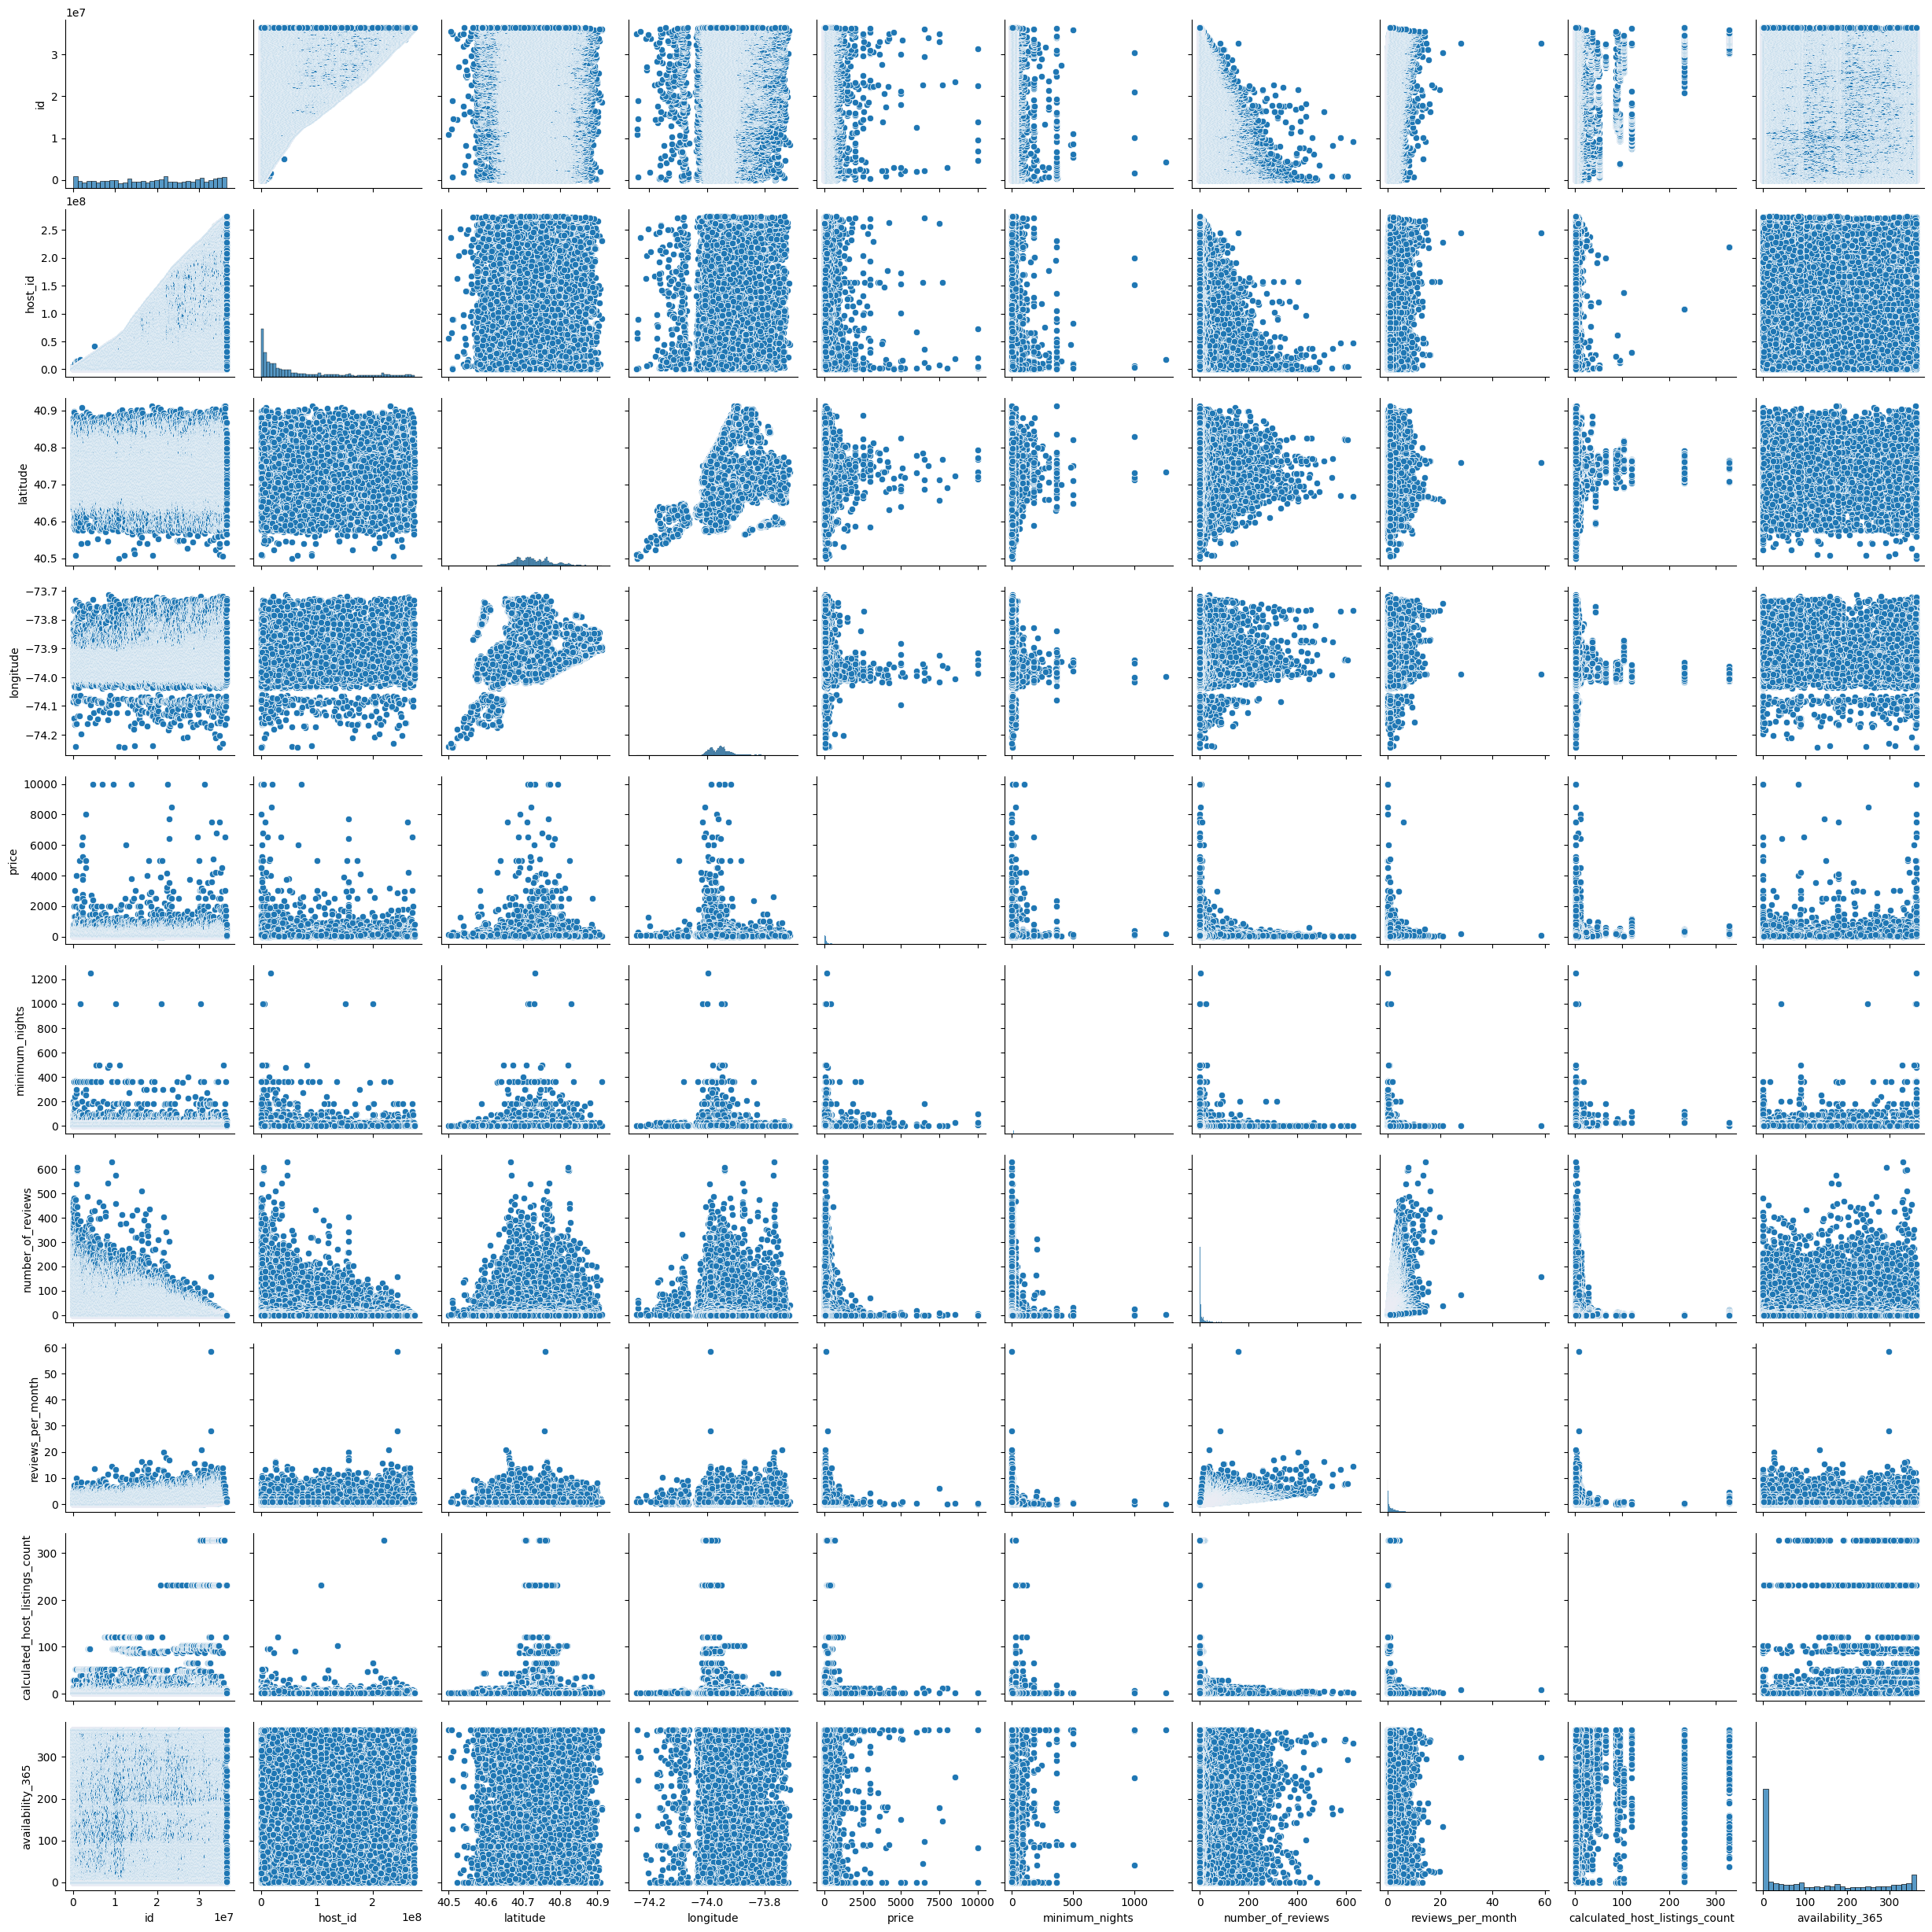

In [35]:
# Pair Plot visualization code
plt.figure()
sns.pairplot(df_original)
plt.show()

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?

Our primary aim of the analysis was to uncover and define the key performance indicators (KPIs) that significantly impact the listing of properties on the Airbnb platform. Based on the analysis conducted on the Airbnb dataset for NYC, the following key performance indicators (KPIs) are identified:

* **Listing Distribution by Neighborhood Group:**
  
  * Understanding the distribution of Airbnb listings across different neighborhood groups provides insights into market penetration and competitiveness.

  * In our analysis, we explored which neighbourhood groups and neighbourhoods host the highest and lowest listings to better understand what places are preferred by guests.

  * We also leaned about the average prices in these neighbourhood groups and neighbourhood.

* **Average Listing Price:**

  * Analyzing the average listing price across neighborhood groups, room types, and specific neighborhoods helps in pricing optimization and revenue management.

  * We analyzed the average pricing by neighbourhood and room type to better understand how prices affect bookings/listings.

* **Booking Duration:**

  * Examining the duration of guest stays provides insights into booking patterns and preferences, which can inform pricing strategies and availability management.

  * Despite analyzing the duration of guest stays, there wasn't a strong correlation observed between the number of nights stayed and the prices of listings. This suggests that pricing may be influenced by factors other than the length of stay, such as location, amenities, or seasonality.

  * The analysis revealed that guests in the NYC Airbnb dataset typically booked rooms or apartments for one night. This booking pattern indicates that most guests are seeking short-term accommodations, which may have minimal impact on pricing dynamics.

* **Room Type Preferences:**

  * Identifying the most preferred room types among guests helps hosts tailor their listings and amenities to meet guest expectations and increase booking conversions.

  * We saw that guests have a preferrence for entire apartments and private rooms more than shared rooms.

* **Competitor Analysis:**
  
  * Comparing listing metrics such as pricing, availability, and amenities with competitors helps hosts identify competitive advantages and adjust strategies accordingly to stay ahead in the market.


# **Conclusion**


In conclusion, the analysis of the Airbnb dataset for NYC has provided valuable insights into various aspects of the short-term rental market, guest preferences, and pricing dynamics. Indeed, to gain a more comprehensive understanding of what makes a listing more preferred than others, additional data and insights are essential. Some potential variables that could provide valuable insights include:

* Number of Beds
* Amenities like swimming pools, wifi, valet parking, etc.
* Location Factors like close attarctions
* Seasonality like check-in and check-out dates

Overall, we wanted to determine the KPIs from the dataset, we have so far gained the following:

**Neighborhood Analysis:** Manhattan emerges as the most popular neighborhood group for Airbnb listings, with neighborhoods like Harlem, Williamsburg, and Bedford-Stuyvesant being particularly sought after by guests. Meanwhile, Staten Island and the Bronx tend to have fewer listings and lower guest demand.

**Room Type Preferences:** Guests predominantly prefer entire apartments or private rooms over shared rooms. Understanding these preferences can help hosts tailor their listings and amenities to attract more bookings.

**Pricing Strategies:** Pricing varies significantly across different neighborhood groups and room types. While Manhattan generally commands higher prices, outliers such as Riverdale in the Bronx and Fort Wadsworth in Staten Island demonstrate unique pricing dynamics.

**Booking Patterns:** Most guests book accommodations for short durations, typically one night stays. This booking pattern suggests a preference for short-term rentals, influencing pricing strategies and availability management.

**Business Recommendations:** Hosts can leverage these insights to optimize their Airbnb listings, pricing strategies, and marketing efforts. This includes emphasizing key amenities, adjusting pricing dynamically, and enhancing the guest experience to maximize revenue and occupancy rates.